In [ ]:
!pip install pandas-datareader


In [ ]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
from datetime import timedelta
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

In [ ]:
azul_daily = web.DataReader("AZUL4.SAO", "av-daily-adjusted", start=start_date, end=end_date, api_key='UMV68KCXCEH0O39I')
azul_daily.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2022-06-01,20.27,20.33,18.80,18.94,18.94,13434300,0.0,1.0
2022-06-02,19.19,19.26,18.61,19.03,19.03,6975600,0.0,1.0
2022-06-03,18.93,18.93,18.37,18.39,18.39,5553400,0.0,1.0
2022-06-06,18.71,18.76,18.01,18.23,18.23,5549700,0.0,1.0
2022-06-07,18.09,18.09,17.56,17.62,17.62,7420200,0.0,1.0


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
azul_daily = azul_daily.reset_index()
azul_daily = azul_daily.rename(columns={'index': 'data'})
azul_daily.head()

,data,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,2022-06-01,20.27,20.33,18.80,18.94,18.94,13434300,0.0,1.0
1,2022-06-02,19.19,19.26,18.61,19.03,19.03,6975600,0.0,1.0
2,2022-06-03,18.93,18.93,18.37,18.39,18.39,5553400,0.0,1.0
3,2022-06-06,18.71,18.76,18.01,18.23,18.23,5549700,0.0,1.0
4,2022-06-07,18.09,18.09,17.56,17.62,17.62,7420200,0.0,1.0


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
azul_daily['average']= azul_daily[['high' , 'low']].mean(axis=1)
azul_daily.head()


,data,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,average
0,2022-06-01,20.27,20.33,18.80,18.94,18.94,13434300,0.0,1.0,19.565
1,2022-06-02,19.19,19.26,18.61,19.03,19.03,6975600,0.0,1.0,18.935
2,2022-06-03,18.93,18.93,18.37,18.39,18.39,5553400,0.0,1.0,18.650
3,2022-06-06,18.71,18.76,18.01,18.23,18.23,5549700,0.0,1.0,18.385
4,2022-06-07,18.09,18.09,17.56,17.62,17.62,7420200,0.0,1.0,17.825


In [ ]:
print(azul_daily['data'].dtype)

object


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
azul_daily_ex = azul_daily [ ['data','open','adjusted close', 'average' ] ].copy()
azul_daily_ex.head()

,data,open,adjusted close,average
0,2022-06-01,20.27,18.94,19.565
1,2022-06-02,19.19,19.03,18.935
2,2022-06-03,18.93,18.39,18.650
3,2022-06-06,18.71,18.23,18.385
4,2022-06-07,18.09,17.62,17.825


In [ ]:
#Convertendo objeto para datetime
azul_daily_ex['data'] = pd.to_datetime(azul_daily_ex['data'])
print(azul_daily_ex['data'].dtype)

datetime64[ns]


In [ ]:
#Verificando células vazias ou com erro de conversão
azul_daily_ex['data'].isnull().sum()

0

In [ ]:
azul_daily_ex['data'].head()

0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-06
4   2022-06-07
Name: data, dtype: datetime64[ns]

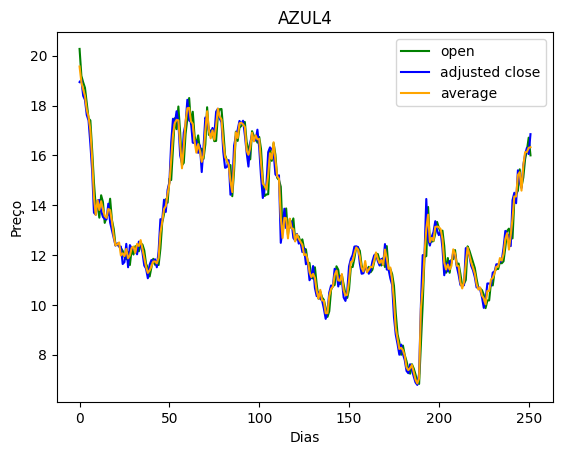

In [ ]:
azul_daily_ex['open'].plot(color ='green')
azul_daily_ex['adjusted close'].plot(color = 'blue')
azul_daily_ex['average'].plot(color = 'orange')

plt.xlabel('Dias')
plt.ylabel('Preço')
plt.title('AZUL4')

plt.legend()

**Tratando dados do IBOV para calcular Beta**

In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

ibov_daily = yf.download('^BVSP', start_date, end_date)
ibov_daily.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200


In [ ]:
print(ibov_daily.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
ibov_daily['Average'] = ibov_daily[['High', 'Low']].mean(axis=1)
ibov_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,Open,High,Low,Close,Adj Close,Volume,Average
0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
print(ibov_daily['data'].dtype)

datetime64[ns]


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
ibov_daily_ex = ibov_daily [['data','Open','Adj Close', 'Average']].copy()
ibov_daily_ex.head()

,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,data,Open,High,Low,Close,Adj Close,Volume,Average
0,0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


<Axes: >

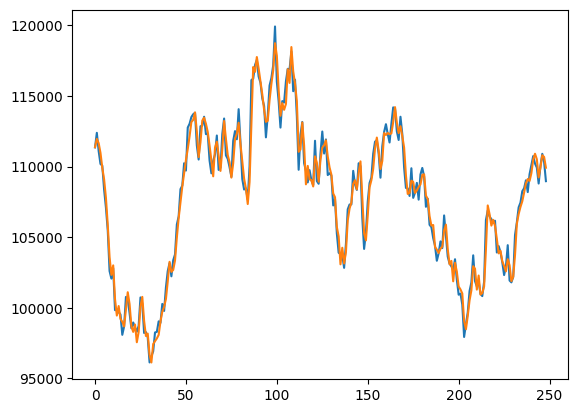

In [ ]:
ibov_daily['Open'].head()
ibov_daily['Adj Close'].plot()
ibov_daily['Average'].plot()



In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 6

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
0,2022-06-01,20.27,18.94,19.565
1,2022-06-02,19.19,19.03,18.935
2,2022-06-03,18.93,18.39,18.650
3,2022-06-06,18.71,18.23,18.385
4,2022-06-07,18.09,17.62,17.825


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1 #retorno_azul_open = preco_open.pct_change().dropna()

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1


**Desvio Padrão**

In [ ]:
#open
dp_azul_open_junho = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_junho= retorno_azul_adjusted_close.std()

#average
dp_azul_average_junho= retorno_azul_average.std()

print (dp_azul_open_junho)
print (dp_azul_adjusted_close_junho)
print (dp_azul_average_junho)

0.03902700319684856
0.03491356310246053
0.031678675022607364


**Índice Sharpe**

In [ ]:
##risk_free_rate = 0.01375

#open
#sharpe_ratio_open = (np.mean(retorno_azul_open) - risk_free_rate) / dp_azul_open

#adjusted close
#sharpe_ratio_adjusted_close = (np.mean(retorno_azul_adjusted_close) - risk_free_rate) / dp_azul_adjusted_close

#average
#sharpe_ratio_average = (np.mean(retorno_azul_average) - risk_free_rate) / dp_azul_average


#print(sharpe_ratio_open)
#print(sharpe_ratio_adjusted_close)
#print(sharpe_ratio_average)


**VaR histórico**

VaR(95) = 2% significa que tenho 95% de certeza que minhas perdas não serão maiores do que 2%, ou que há uma possibilidade de 5% de minhas perdas excederem 2%.

In [ ]:
#VaR histórico:- df.quantile(.05) significa biblioteca para calcular o quantil de 5% do dataframe.
#O resultado é o valor correspondente ao percentil de 5%, ou seja, o valor abaixo do qual 5% dos dados estão localizados,
# ou seja, há uma possibilidade de 5% de minhas perdas excederem 2% (VaR(95%))

VaR_AZUL4_open_junho_2022 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_junho_2022)

0.06898113481815522


In [ ]:
VaR_AZUL4_adjusted_close_junho_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_junho_22)

0.06833352677327172


In [ ]:
VaR_AZUL4_average_junho_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_junho_22)

0.06934219824581758


**VaR Paramétrico**

In [ ]:
z = scipy.stats.norm.ppf(.05)
print(z)

-1.6448536269514729


In [ ]:
#ppf da bb SciPy retorna o valor crítico z correspondente a um nível de confiança de 95%. Neste caso, .05 representa o quantil de 5% (ou nível de confiança de 95%)
#da distribuição normal padrão. Esse valor crítico é usado para calcular o quantil inferior para o VaR.

#ddof=0 indica que o desvio padrão amostral não será ajustado pela correção de Bessel (n-1).
#ddof=1 desvio ajustado para amostra.

In [ ]:
VaRg_AZUL4_open_junho_22 =-((retorno_azul_open).mean()+z*(retorno_azul_open).std(ddof=1))
print(VaRg_AZUL4_open_junho_22)

0.0877367745987104


In [ ]:
VaRg_AZUL4_adjusted_close_junho_22 = -((retorno_azul_adjusted_close).mean()+z*(retorno_azul_adjusted_close).std(ddof=1))
print(VaRg_AZUL4_adjusted_close_junho_22)

0.07786570603352583


In [ ]:
VaRg_AZUL4_average_junho_22 =-((retorno_azul_average).mean()+z*(retorno_azul_average).std(ddof=1))
print(VaRg_AZUL4_average_junho_22)

0.07422134820605963


**CVaR**

In [ ]:
print("Skewness:", scipy.stats.skew(retorno_azul_open))
print("Kurtosis:", scipy.stats.kurtosis(retorno_azul_open))

Skewness: 0.6426452247661875
Kurtosis: -0.23854822763098404


In [ ]:
print("Skewness:", scipy.stats.skew(retorno_azul_adjusted_close))
print("Kurtosis:", scipy.stats.kurtosis(retorno_azul_adjusted_close))

Skewness: -0.3610203581130203
Kurtosis: 0.932691216739836


In [ ]:
print("Skewness:", scipy.stats.skew(retorno_azul_average))
print("Kurtosis:", scipy.stats.kurtosis(retorno_azul_average))

Skewness: -0.062024451104263446
Kurtosis: 0.6384458339320735


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_junho_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1)))
#print(-(retorno_azul_open.mean() + zb*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_junho_22)

0.08049259762921987


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

zb = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36


CF_AZUL4_adjusted_close_junho_22 = (-(retorno_azul_adjusted_close.mean() + zb*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_junho_22)

0.08070600077882434


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_junho_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_junho_22)

0.07436942472812796


In [ ]:
CVaR_AZUL4_open_junho_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_junho_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                                 -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_junho_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_junho_22)
print(CVaR_AZUL4_adjusted_close_junho_22)
print(CVaR_AZUL4_average_junho_22)

0.02354306684132732
0.02043800513464451
0.02211456469810688


In [ ]:
# Junho

#Armazenar as saídas em uma lista
VaR_AZUL4_Junho = [VaR_AZUL4_open_junho_2022, VaR_AZUL4_adjusted_close_junho_22, VaR_AZUL4_average_junho_22]
VaRg_AZUL4_Junho = [VaRg_AZUL4_open_junho_22, VaRg_AZUL4_adjusted_close_junho_22, VaRg_AZUL4_average_junho_22]
CF_AZUL4_Junho = [CF_AZUL4_open_junho_22, CF_AZUL4_adjusted_close_junho_22, CF_AZUL4_average_junho_22]
DP_AZUL4_Junho = [dp_azul_open_junho,dp_azul_adjusted_close_junho, dp_azul_average_junho ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Junho': DP_AZUL4_Junho, 'VaR_AZUL4_Junho': VaR_AZUL4_Junho, 'VaRg_AZUL4_Junho': VaRg_AZUL4_Junho, 'CF_AZUL4_Junho': CF_AZUL4_Junho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Junho,VaR_AZUL4_Junho,VaRg_AZUL4_Junho,CF_AZUL4_Junho
open,0.039027,0.068981,0.087737,0.080493
adjusted close,0.034914,0.068334,0.077866,0.080706
average,0.031679,0.069342,0.074221,0.074369


**Beta**

In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

ibov_daily = yf.download('^BVSP', start_date, end_date)
ibov_daily.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200


In [ ]:
print(ibov_daily.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
ibov_daily['Average'] = ibov_daily[['High', 'Low']].mean(axis=1)
ibov_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,Open,High,Low,Close,Adj Close,Volume,Average
0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
print(ibov_daily['data'].dtype)

datetime64[ns]


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
ibov_daily_ex = ibov_daily [['data','Open','Adj Close', 'Average']].copy()
ibov_daily_ex.head()

,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 6

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()



,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

1    0.000108
2    0.009240
3   -0.011478
4   -0.008254
5   -0.001071
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

1    0.009276
2   -0.011486
3   -0.008245
4   -0.001053
5   -0.015463
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

1    0.005270
2   -0.002679
3   -0.006166
4   -0.009556
5   -0.007469
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_junho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.42364044450168514
Coeficiente de Determinação (R²):
0.017049090708366466
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.3122
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.583
Time:                        23:08:23   Log-Likelihood:                 37.176
No. Observations:                  20   AIC:                            -70.35
Df Residuals:                      18   BIC:                            -68.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_junho =(model.params[1])

print("Junho:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Junho:
Coeficiente Beta:
1.0591695975293431
Coeficiente de Determinação (R²):
0.13312192566377068
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     2.764
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.114
Time:                        23:08:23   Log-Likelihood:                 40.660
No. Observations:                  20   AIC:                            -77.32
Df Residuals:                      18   BIC:                            -75.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_junho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.455566016864157
Coeficiente de Determinação (R²):
0.2279879037908371
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.316
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0333
Time:                        23:08:23   Log-Likelihood:                 43.764
No. Observations:                  20   AIC:                            -83.53
Df Residuals:                      18   BIC:                            -81.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
data = {'open': [beta_open_junho],
    'adjusted close': [beta_adjusted_close_junho],
    'average': [beta_average_junho]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

          open  adjusted close   average
Betas -0.42364         1.05917  1.455566


**CAPM**

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_junho = rf + beta_open_junho * (rm - rf)

print("Retorno esperado é:", re_open_junho)

-0.42364044450168514
-0.005482137972576256
Retorno esperado é: 0.017689103738400172


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_junho = rf + beta_adjusted_close_junho * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_junho)

1.0591695975293431
-0.0060265445995932865
Retorno esperado é: -0.007021804192541139


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_junho = rf + beta_average_junho * (rm - rf)

print("Retorno esperado é:", re_average_junho)

1.455566016864157
-0.005977630309769655
Retorno esperado é: -0.013618174618350742


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_junho],
    'adjusted close': [re_adjusted_close_junho],
    'average': [re_average_junho]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Junho'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_AZUL4_Junho  0.017689       -0.007022 -0.013618


In [ ]:
#Retorno realizado mensal
rk_open_junho = np.mean(retorno_azul_open)
rk_adjusted_close_junho = np.mean(retorno_azul_adjusted_close)
rk_average_junho = np.mean(retorno_azul_average)

Re_AZUL4_Junho = [re_open_junho, re_adjusted_close_junho, re_average_junho]
Rk_AZUL4_Junho = [rk_open_junho, rk_adjusted_close_junho, rk_average_junho]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Junho' : Re_AZUL4_Junho, 'Rk_AZUL4_Junho': Rk_AZUL4_Junho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Junho,Rk_AZUL4_Junho
open,0.017689,-0.023543
adjusted close,-0.007022,-0.020438
average,-0.013618,-0.022115


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 7

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
21,2022-07-01,12.43,12.47,12.435
22,2022-07-04,12.35,12.34,12.505
23,2022-07-05,12.28,12.34,11.985
24,2022-07-06,12.17,11.64,12.070
25,2022-07-07,11.92,11.72,11.960


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_julho = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_julho= retorno_azul_adjusted_close.std()

#average
dp_azul_average_julho= retorno_azul_average.std()

print (dp_azul_open_julho)
print (dp_azul_adjusted_close_julho)
print (dp_azul_average_julho)

0.03902700319684856
0.03491356310246053
0.031678675022607364


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_julho_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_julho_22)

0.04297400617830442


In [ ]:
VaR_AZUL4_adjusted_close_julho_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_julho_22)

0.057664889704685814


In [ ]:
VaR_AZUL4_average_julho_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_julho_22)

0.03117267588677066


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_julho_22 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_julho_22 )

0.045912722624184776


In [ ]:
VaRg_AZUL4_adjusted_close_julho_22 = -((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_julho_22)

0.06493831704194704


In [ ]:
VaRg_AZUL4_average_julho_22 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_julho_22)

0.03889865941409544


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_julho_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_julho_22)

0.04302875893123895


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_julho_22 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_julho_22)

0.06132470674799078


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_julho_22= (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print (CF_AZUL4_average_julho_22)

0.04099548754503697


In [ ]:
CVaR_AZUL4_open_julho_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_julho_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                                 -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_julho_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_julho_22)
print(CVaR_AZUL4_adjusted_close_julho_22)
print(CVaR_AZUL4_average_julho_22)

0.005061840766109926
0.00656414068165039
0.0026392149865616054


In [ ]:
# Julho

#Armazenar as saídas em uma lista
VaR_AZUL4_Julho = [VaR_AZUL4_open_julho_22, VaR_AZUL4_adjusted_close_julho_22, VaR_AZUL4_average_julho_22]
VaRg_AZUL4_Julho = [VaRg_AZUL4_open_julho_22, VaRg_AZUL4_adjusted_close_julho_22, VaRg_AZUL4_average_julho_22]
CF_AZUL4_Julho = [CF_AZUL4_open_julho_22, CF_AZUL4_adjusted_close_julho_22, CF_AZUL4_average_julho_22]
DP_AZUL4_Julho = [dp_azul_open_julho,dp_azul_adjusted_close_julho, dp_azul_average_julho ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Julho': DP_AZUL4_Julho, 'VaR_AZUL4_Julho': VaR_AZUL4_Julho,
                   'VaRg_AZUL4_Julho': VaRg_AZUL4_Julho, 'CF_AZUL4_Julho': CF_AZUL4_Julho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Julho,VaR_AZUL4_Julho,VaRg_AZUL4_Julho,CF_AZUL4_Julho
open,0.039027,0.042974,0.045913,0.043029
adjusted close,0.034914,0.057665,0.064938,0.061325
average,0.031679,0.031173,0.038899,0.040995


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 7

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
21,2022-07-01,98542.0,98954.0,98285.5
22,2022-07-04,98952.0,98609.0,98808.5
23,2022-07-05,98608.0,98295.0,97553.5
24,2022-07-06,98294.0,98719.0,98282.0
25,2022-07-07,98722.0,100730.0,100071.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

22    0.004161
23   -0.003476
24   -0.003184
25    0.004354
26    0.020360
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

22   -0.003486
23   -0.003184
24    0.004314
25    0.020371
26   -0.004378
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

22    0.005321
23   -0.012701
24    0.007468
25    0.018203
26    0.006960
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_julho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.6211798554415052
Coeficiente de Determinação (R²):
0.05913501294942891
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.131
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.302
Time:                        23:08:24   Log-Likelihood:                 45.231
No. Observations:                  20   AIC:                            -86.46
Df Residuals:                      18   BIC:                            -84.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_julho =(model.params[1])

print("Julho")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Julho
Coeficiente Beta:
1.3513428469562467
Coeficiente de Determinação (R²):
0.13834837140661005
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.890
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.106
Time:                        23:08:24   Log-Likelihood:                 39.006
No. Observations:                  20   AIC:                            -74.01
Df Residuals:                      18   BIC:                            -72.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_julho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.7803067542833688
Coeficiente de Determinação (R²):
0.12490704457398416
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.569
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.126
Time:                        23:08:24   Log-Likelihood:                 49.763
No. Observations:                  20   AIC:                            -95.53
Df Residuals:                      18   BIC:                            -93.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
data = {'open': [beta_open_julho],
    'adjusted close': [beta_adjusted_close_julho],
    'average': [beta_average_julho]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

          open  adjusted close   average
Betas  0.62118        1.351343  0.780307


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_julho = rf + beta_open_julho * (rm - rf)

print("Retorno esperado é:", re_open_julho)

0.6211798554415052
0.0020701173253123706
Retorno esperado é: 0.005374866137369366


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_julho = rf + beta_adjusted_close_julho * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_julho)

1.3513428469562467
0.002138000527991657
Retorno esperado é: -0.0009031917290987183


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_julho = rf + beta_average_julho * (rm - rf)

print("Retorno esperado é:", re_average_junho)

0.7803067542833688
0.0025150251824768545
Retorno esperado é: -0.013618174618350742


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_julho],
    'adjusted close': [re_adjusted_close_julho],
    'average': [re_average_julho]}

df = pd.DataFrame(data, index=['Retorno estimado_AZUL4_Julho'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno estimado_AZUL4_Julho  0.005375       -0.000903  0.004334


In [ ]:
#Retorno realizado mensal
rk_open_julho = np.mean(retorno_azul_open)
rk_adjusted_close_julho = np.mean(retorno_azul_adjusted_close)
rk_average_julho = np.mean(retorno_azul_average)

Re_AZUL4_Julho = [re_open_julho, re_adjusted_close_julho, re_average_julho]
Rk_AZUL4_Julho = [rk_open_julho, rk_adjusted_close_julho, rk_average_julho]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Julho' : Re_AZUL4_Julho, 'Rk_AZUL4_Julho': Rk_AZUL4_Julho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Julho,Rk_AZUL4_Julho
open,0.005375,-0.002050
adjusted close,-0.000903,-0.002370
average,0.004334,-0.002639


In [ ]:
print(re_open_julho)

0.005374866137369366


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 8

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
42,2022-08-01,11.61,11.83,11.745
43,2022-08-02,11.66,11.51,11.665
44,2022-08-03,11.60,12.16,11.890
45,2022-08-04,12.26,13.44,12.880
46,2022-08-05,13.30,13.40,13.330


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_agosto = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_agosto= retorno_azul_adjusted_close.std()

#average
dp_azul_average_agosto= retorno_azul_average.std()

print (dp_azul_open_agosto)
print (dp_azul_adjusted_close_agosto)
print (dp_azul_average_agosto)

0.026666564043956464
0.03803899974480955
0.022044176961044312


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_agosto_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_agosto_22)

0.05893789477527491


In [ ]:
VaR_AZUL4_adjusted_close_agosto_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_agosto_22)

0.04827070367273121


In [ ]:
VaR_AZUL4_average_agosto_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_agosto_22)

0.05385117820932362


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_agosto_22 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_agosto_22 )

0.0640786625780769


In [ ]:
VaRg_AZUL4_adjusted_close_agosto_22 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_agosto_22 )

0.06790676103385912


In [ ]:
VaRg_AZUL4_average_agosto_22 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_agosto_22 )

0.04778403903640271


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_agosto_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_agosto_22)

0.07065089967407755


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_agosto_22 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_agosto_22)

0.06677662560239839


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_agosto_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_agosto_22)

0.05199726191500325


In [ ]:
CVaR_AZUL4_open_agosto_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_agosto_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_agosto_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_agosto_22)
print(CVaR_AZUL4_adjusted_close_agosto_22)
print(CVaR_AZUL4_average_agosto_22)

-0.004437236048696669
-0.0037936044304159515
-0.0020912740637781617


In [ ]:
# Agosto

#Armazenar as saídas em uma lista
VaR_AZUL4_Agosto = [VaR_AZUL4_open_agosto_22, VaR_AZUL4_adjusted_close_agosto_22, VaR_AZUL4_average_agosto_22]
VaRg_AZUL4_Agosto = [VaRg_AZUL4_open_agosto_22, VaRg_AZUL4_adjusted_close_agosto_22, VaRg_AZUL4_average_agosto_22]
CF_AZUL4_Agosto = [CF_AZUL4_open_agosto_22, CF_AZUL4_adjusted_close_agosto_22 , CF_AZUL4_average_agosto_22]
DP_AZUL4_Agosto = [dp_azul_open_agosto,dp_azul_adjusted_close_agosto, dp_azul_average_agosto ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Agosto': DP_AZUL4_Agosto, 'VaR_AZUL4_Agosto': VaR_AZUL4_Agosto,
                   'VaRg_AZUL4_Agosto': VaRg_AZUL4_Agosto, 'CF_AZUL4_Agosto': CF_AZUL4_Agosto})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Agosto,VaR_AZUL4_Agosto,VaRg_AZUL4_Agosto,CF_AZUL4_Agosto
open,0.026667,0.058938,0.064079,0.070651
adjusted close,0.038039,0.048271,0.067907,0.066777
average,0.022044,0.053851,0.047784,0.051997


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 8

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
42,2022-08-01,103165.0,102225.0,102540.5
43,2022-08-02,102225.0,103362.0,102677.0
44,2022-08-03,103362.0,103775.0,103350.0
45,2022-08-04,103777.0,105892.0,104969.5
46,2022-08-05,105893.0,106472.0,106347.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

43   -0.009112
44    0.011123
45    0.004015
46    0.020390
47    0.005477
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

43    0.011123
44    0.003996
45    0.020400
46    0.005477
47    0.018127
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

43    0.001331
44    0.006555
45    0.015670
46    0.013123
47    0.010663
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_agosto =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
3.104002958750853
Coeficiente de Determinação (R²):
0.5875929768556354
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     28.50
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.18e-05
Time:                        23:08:24   Log-Likelihood:                 44.970
No. Observations:                  22   AIC:                            -85.94
Df Residuals:                      20   BIC:                            -83.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_agosto =(model.params[1])

print("Agosto")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Agosto
Coeficiente Beta:
3.4234225204015813
Coeficiente de Determinação (R²):
0.6739527959650613
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     41.34
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.85e-06
Time:                        23:08:25   Log-Likelihood:                 46.973
No. Observations:                  22   AIC:                            -89.95
Df Residuals:                      20   BIC:                            -87.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_agosto =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
3.8801978691356123
Coeficiente de Determinação (R²):
0.7874880910531369
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     74.11
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.69e-08
Time:                        23:08:25   Log-Likelihood:                 57.656
No. Observations:                  22   AIC:                            -111.3
Df Residuals:                      20   BIC:                            -109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_agosto],
    'adjusted close': [beta_adjusted_close_agosto],
    'average': [beta_average_agosto]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  3.104003        3.423423  3.880198


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_agosto = rf + beta_open_agosto * (rm - rf)

print("Retorno esperado é:", re_open_agosto)

3.104002958750853
0.0031708150511855545
Retorno esperado é: -0.012868201552768143


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_agosto = rf + beta_adjusted_close_agosto * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_agosto)

3.4234225204015813
0.003211288872304334
Retorno esperado é: -0.015164608554689804


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_agosto = rf + beta_average_agosto * (rm - rf)

print("Retorno esperado é:", re_average_agosto)

3.8801978691356123
0.003418695309796216
Retorno esperado é: -0.017823385442101346


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_agosto],
    'adjusted close': [re_adjusted_close_agosto],
    'average': [re_average_agosto]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_agosto'])

# Imprimir a tabela
print(df)

                                   open  adjusted close   average
Retorno esperado_AZUL4_agosto -0.012868       -0.015165 -0.017823


In [ ]:
#Retorno realizado mensal
rk_open_agosto = np.mean(retorno_azul_open)
rk_adjusted_close_agosto = np.mean(retorno_azul_adjusted_close)
rk_average_agosto = np.mean(retorno_azul_average)

Re_AZUL4_Agosto = [re_open_agosto, re_adjusted_close_agosto, re_average_agosto]
Rk_AZUL4_Agosto = [rk_open_agosto, rk_adjusted_close_agosto, rk_average_agosto]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Agosto' : Re_AZUL4_Agosto, 'Rk_AZUL4_Agosto': Rk_AZUL4_Agosto})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Agosto,Rk_AZUL4_Agosto
open,-0.012868,0.018069
adjusted close,-0.015165,0.016442
average,-0.017823,0.016505


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 9

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
65,2022-09-01,16.41,16.58,16.105
66,2022-09-02,16.80,16.10,16.450
67,2022-09-05,16.22,16.40,16.180
68,2022-09-06,16.27,15.33,15.740
69,2022-09-08,15.86,16.32,16.000


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_setembro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_setembro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_setembro= retorno_azul_average.std()

print (dp_azul_open_setembro)
print (dp_azul_adjusted_close_setembro)
print (dp_azul_average_setembro)

0.04994244320443616
0.05128035677603947
0.039085110212347667


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_setembro_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_setembro_22)

0.06281589053879899


In [ ]:
VaR_AZUL4_adjusted_close_setembro_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_setembro_22)

0.06911881567049824


In [ ]:
VaR_AZUL4_average_setembro_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_setembro_22)

0.044055468899237366


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_setembro_22 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_setembro_22 )

0.07369003443542017


In [ ]:
VaRg_AZUL4_adjusted_close_setembro_22 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_setembro_22 )

0.07488465436155768


In [ ]:
VaRg_AZUL4_average_setembro_22 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_setembro_22 )

0.058482214752814246


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_setembro_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_setembro_22)

0.06878520984251235


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_setembro_22 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_setembro_22)


0.07517053868116208


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_setembro_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_setembro_22)

0.05431527611092427


In [ ]:
CVaR_AZUL4_open_setembro_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_setembro_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_setembro_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_setembro_22)
print(CVaR_AZUL4_adjusted_close_setembro_22)
print(CVaR_AZUL4_average_setembro_22)

0.010921759255720698
0.00920699681207084
0.008160698216023393


In [ ]:
# Setembro

#Armazenar as saídas em uma lista
VaR_AZUL4_Setembro = [VaR_AZUL4_open_setembro_22, VaR_AZUL4_adjusted_close_setembro_22, VaR_AZUL4_average_setembro_22]
VaRg_AZUL4_Setembro = [VaRg_AZUL4_open_setembro_22, VaRg_AZUL4_adjusted_close_setembro_22, VaRg_AZUL4_average_setembro_22]
CF_AZUL4_Setembro = [CF_AZUL4_open_setembro_22, CF_AZUL4_adjusted_close_setembro_22 , CF_AZUL4_average_setembro_22]
DP_AZUL4_Setembro = [dp_azul_open_setembro, dp_azul_adjusted_close_setembro, dp_azul_average_setembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Setembro': DP_AZUL4_Setembro, 'VaR_AZUL4_Setembro': VaR_AZUL4_Setembro,
                   'VaRg_AZUL4_Setembro': VaRg_AZUL4_Setembro, 'CF_AZUL4_Setembro': CF_AZUL4_Setembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Setembro,VaR_AZUL4_Setembro,VaRg_AZUL4_Setembro,CF_AZUL4_Setembro
open,0.049942,0.062816,0.073690,0.068785
adjusted close,0.051280,0.069119,0.074885,0.075171
average,0.039085,0.044055,0.058482,0.054315


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 9

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
65,2022-09-01,109524.0,110405.0,109311.0
66,2022-09-02,110409.0,110864.0,111336.5
67,2022-09-05,110868.0,112203.0,111768.0
68,2022-09-06,112203.0,109764.0,110775.5
69,2022-09-08,109771.0,109916.0,109693.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

66    0.008080
67    0.004157
68    0.012041
69   -0.021675
70    0.001376
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

66    0.004157
67    0.012078
68   -0.021737
69    0.001385
70    0.021689
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

66    0.018530
67    0.003876
68   -0.008880
69   -0.009768
70    0.014016
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_setembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.4421101632516737
Coeficiente de Determinação (R²):
0.20102499604863422
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.529
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0474
Time:                        23:08:25   Log-Likelihood:                 38.142
No. Observations:                  20   AIC:                            -72.28
Df Residuals:                      18   BIC:                            -70.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_setembro =(model.params[1])

print("Setembro")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Setembro
Coeficiente Beta:
1.961745751913937
Coeficiente de Determinação (R²):
0.48692783050506483
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000624
Time:                        23:08:25   Log-Likelihood:                 41.999
No. Observations:                  20   AIC:                            -80.00
Df Residuals:                      18   BIC:                            -78.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_setembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.949669407729234
Coeficiente de Determinação (R²):
0.47999520839260434
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     16.62
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000709
Time:                        23:08:25   Log-Likelihood:                 47.062
No. Observations:                  20   AIC:                            -90.12
Df Residuals:                      18   BIC:                            -88.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_setembro],
    'adjusted close': [beta_adjusted_close_setembro],
    'average': [beta_average_setembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

          open  adjusted close   average
Betas  1.44211        1.961746  1.949669


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_setembro = rf + beta_open_setembro * (rm - rf)

print("Retorno esperado é:", re_open_setembro)

1.4421101632516737
-0.0007778230620357485
Retorno esperado é: -0.0058938043336188226


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_setembro = rf + beta_adjusted_close_setembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_setembro)

1.961745751913937
-5.861394420433874e-05
Retorno esperado é: -0.010495983785823226


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_setembro = rf + beta_average_setembro * (rm - rf)

print("Retorno esperado é:", re_average_setembro)

1.949669407729234
-0.00012036520154047881
Retorno esperado é: -0.010485319495649171


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_setembro],
    'adjusted close': [re_adjusted_close_setembro],
    'average': [re_average_setembro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Setembro'])

# Imprimir a tabela
print(df)

                                     open  adjusted close   average
Retorno esperado_AZUL4_Setembro -0.005894       -0.010496 -0.010485


In [ ]:
#Retorno realizado mensal
rk_open_setembro = np.mean(retorno_azul_open)
rk_adjusted_close_setembro = np.mean(retorno_azul_adjusted_close)
rk_average_setembro = np.mean(retorno_azul_average)

Re_AZUL4_Setembro = [re_open_setembro, re_adjusted_close_setembro, re_average_setembro]
Rk_AZUL4_Setembro = [rk_open_setembro, rk_adjusted_close_setembro, rk_average_setembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Setembro' : Re_AZUL4_Setembro, 'Rk_AZUL4_Setembro': Rk_AZUL4_Setembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Setembro,Rk_AZUL4_Setembro
open,-0.005894,-0.005844
adjusted close,-0.010496,-0.005070
average,-0.010485,-0.004643


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 10

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
86,2022-10-03,15.37,16.39,15.705
87,2022-10-04,16.95,16.77,16.925
88,2022-10-05,16.58,17.02,16.695
89,2022-10-06,17.11,17.38,17.285
90,2022-10-07,17.18,17.26,17.305


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_outubro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_outubro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_outubro= retorno_azul_average.std()

print (dp_azul_open_outubro)
print (dp_azul_adjusted_close_outubro)
print (dp_azul_average_outubro)

0.04124743515235804
0.04244418885327683
0.032731743156608796


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_outubro_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_outubro_22)

0.04948767633750327


In [ ]:
VaR_AZUL4_adjusted_close_outubro_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_outubro_22)

0.05814432363481755


In [ ]:
VaR_AZUL4_average_outubro_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_outubro_22)

0.05552726465118342


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_outubro_22 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_outubro_22 )

0.06871233940157315


In [ ]:
VaRg_AZUL4_adjusted_close_outubro_22 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_outubro_22 )

0.06625958080579285


In [ ]:
VaRg_AZUL4_average_outubro_22 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_outubro_22 )

0.05717939344792884


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_outubro_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_outubro_22)

0.05664268754316268


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_outubro_22 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_outubro_22)

0.06400117047482619


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_outubro_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_outubro_22)

0.05445942528226735


In [ ]:
CVaR_AZUL4_open_outubro_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_outubro_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_outubro_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_outubro_22)
print(CVaR_AZUL4_adjusted_close_setembro_22)
print(CVaR_AZUL4_average_outubro_22)

0.013067623211058902
0.00920699681207084
0.005496354679370843


In [ ]:
# Outubro

#Armazenar as saídas em uma lista
VaR_AZUL4_Outubro = [VaR_AZUL4_open_outubro_22, VaR_AZUL4_adjusted_close_outubro_22, VaR_AZUL4_average_outubro_22]
VaRg_AZUL4_Outubro = [VaRg_AZUL4_open_outubro_22, VaRg_AZUL4_adjusted_close_outubro_22, VaRg_AZUL4_average_outubro_22]
CF_AZUL4_Outubro = [CF_AZUL4_open_outubro_22, CF_AZUL4_adjusted_close_outubro_22 , CF_AZUL4_average_outubro_22]
DP_AZUL4_Outubro = [dp_azul_open_outubro ,dp_azul_adjusted_close_outubro, dp_azul_average_outubro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Outubro': DP_AZUL4_Outubro, 'VaR_AZUL4_Outubro': VaR_AZUL4_Outubro,
                   'VaRg_AZUL4_Outubro': VaRg_AZUL4_Outubro, 'CF_AZUL4_Outubro': CF_AZUL4_Outubro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Outubro,VaR_AZUL4_Outubro,VaRg_AZUL4_Outubro,CF_AZUL4_Outubro
open,0.041247,0.049488,0.068712,0.056643
adjusted close,0.042444,0.058144,0.066260,0.064001
average,0.032732,0.055527,0.057179,0.054459


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 10

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
86,2022-10-03,110048.0,116134.0,113091.0
87,2022-10-04,116704.0,116230.0,117058.5
88,2022-10-05,116231.0,117198.0,116710.0
89,2022-10-06,117200.0,117561.0,117763.0
90,2022-10-07,117560.0,116375.0,116942.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

87    0.060483
88   -0.004053
89    0.008337
90    0.003072
91   -0.010063
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

87    0.000827
88    0.008328
89    0.003097
90   -0.010088
91   -0.003729
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

87    0.035082
88   -0.002977
89    0.009022
90   -0.006972
91   -0.007619
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_outubro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.5722615501077783
Coeficiente de Determinação (R²):
0.6070467841487615
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     26.26
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           8.45e-05
Time:                        23:08:26   Log-Likelihood:                 43.473
No. Observations:                  19   AIC:                            -82.95
Df Residuals:                      17   BIC:                            -81.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_outubro =(model.params[1])

print("Outubro")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Outubro
Coeficiente Beta:
2.098353366254982
Coeficiente de Determinação (R²):
0.5718555358947102
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     22.71
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000180
Time:                        23:08:26   Log-Likelihood:                 42.659
No. Observations:                  19   AIC:                            -81.32
Df Residuals:                      17   BIC:                            -79.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_outubro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.0149212906052623
Coeficiente de Determinação (R²):
0.5945011288543789
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     24.92
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000111
Time:                        23:08:26   Log-Likelihood:                 46.329
No. Observations:                  19   AIC:                            -88.66
Df Residuals:                      17   BIC:                            -86.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_outubro],
    'adjusted close': [beta_adjusted_close_outubro],
    'average': [beta_average_outubro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  1.572262        2.098353  2.014921


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_outubro = rf + beta_open_outubro * (rm - rf)

print("Retorno esperado é:", re_open_outubro)

1.5722615501077783
0.0022900961393860046
Retorno esperado é: -0.002576310181579642


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_outubro = rf + beta_adjusted_close_outubro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_outubro)

2.098353366254982
5.5998888840447236e-05
Retorno esperado é: -0.011738023115212003


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_outubro = rf + beta_average_outubro * (rm - rf)

print("Retorno esperado é:", re_average_outubro)

2.0149212906052623
0.0007033783542784839
Retorno esperado é: -0.009537718144769482


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_outubro],
    'adjusted close': [re_adjusted_close_outubro],
    'average': [re_average_outubro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Outubro'])

# Imprimir a tabela
print(df)

                                    open  adjusted close   average
Retorno esperado_AZUL4_Outubro -0.002576       -0.011738 -0.009538


In [ ]:
#Retorno realizado mensal
rk_open_outubro = np.mean(retorno_azul_open)
rk_adjusted_close_outubro = np.mean(retorno_azul_adjusted_close)
rk_average_outubro = np.mean(retorno_azul_average)

Re_AZUL4_Outubro = [re_open_outubro, re_adjusted_close_outubro, re_average_outubro]
Rk_AZUL4_Outubro = [rk_open_outubro, rk_adjusted_close_outubro, rk_average_outubro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Outubro' : Re_AZUL4_Outubro, 'Rk_AZUL4_Outubro': Rk_AZUL4_Outubro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Outubro,Rk_AZUL4_Outubro
open,-0.002576,-0.002527
adjusted close,-0.011738,-0.000077
average,-0.009538,-0.001119


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 11

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
106,2022-11-01,16.20,16.32,16.085
107,2022-11-03,15.78,16.23,15.860
108,2022-11-04,16.49,16.14,16.525
109,2022-11-07,16.03,15.24,15.815
110,2022-11-08,15.10,15.15,15.160


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_novembro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_novembro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_novembro= retorno_azul_average.std()

print (dp_azul_open_novembro)
print (dp_azul_adjusted_close_novembro)
print (dp_azul_average_novembro)

0.04023781156765054
0.0402359810389803
0.034082583418239734


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_novembro_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_novembro_22)

0.08112889703674056


In [ ]:
VaR_AZUL4_adjusted_close_novembro_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_novembro_22)

0.06847829801777168


In [ ]:
VaR_AZUL4_average_novembro_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_novembro_22)

0.06608905106622201


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_novembro_22 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_novembro_22 )

0.08752847046521926


In [ ]:
VaRg_AZUL4_adjusted_close_novembro_22 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_novembro_22 )

0.09686286319598958


In [ ]:
VaRg_AZUL4_average_novembro_22 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_novembro_22 )

0.0834050450471606


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_novembro_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_novembro_22)

0.09540466391855129


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_novembro_22  = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_novembro_22 )

0.11455874144540223


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_novembro_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_novembro_22)

0.08128783539332798


In [ ]:
CVaR_AZUL4_open_novembro_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_novembro_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_novembro_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_novembro_22)
print(CVaR_AZUL4_adjusted_close_novembro_22)
print(CVaR_AZUL4_average_novembro_22)

0.013610995931072664
0.013543938834192271
0.01445975919280156


In [ ]:
# Novembro

#Armazenar as saídas em uma lista
VaR_AZUL4_Novembro = [VaR_AZUL4_open_novembro_22, VaR_AZUL4_adjusted_close_novembro_22, VaR_AZUL4_average_novembro_22]
VaRg_AZUL4_Novembro = [VaRg_AZUL4_open_novembro_22, VaRg_AZUL4_adjusted_close_novembro_22, VaRg_AZUL4_average_novembro_22]
CF_AZUL4_Novembro = [CF_AZUL4_open_novembro_22, CF_AZUL4_adjusted_close_novembro_22 , CF_AZUL4_average_novembro_22]
DP_AZUL4_Novembro = [dp_azul_open_novembro,dp_azul_adjusted_close_novembro, dp_azul_average_novembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Novembro': DP_AZUL4_Novembro, 'VaR_AZUL4_Novembro': VaR_AZUL4_Novembro,
                   'VaRg_AZUL4_Novembro': VaRg_AZUL4_Novembro, 'CF_AZUL4_Novembro': CF_AZUL4_Novembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Novembro,VaR_AZUL4_Novembro,VaRg_AZUL4_Novembro,CF_AZUL4_Novembro
open,0.040238,0.081129,0.087528,0.095405
adjusted close,0.040236,0.068478,0.096863,0.114559
average,0.034083,0.066089,0.083405,0.081288


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 11

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
106,2022-11-01,116037.0,116929.0,116904.0
107,2022-11-03,116927.0,116896.0,115929.0
108,2022-11-04,116907.0,118155.0,118471.5
109,2022-11-07,118148.0,115342.0,116753.0
110,2022-11-08,115340.0,116160.0,115880.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

107    0.007670
108   -0.000171
109    0.010615
110   -0.023767
111    0.007049
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

107   -0.000282
108    0.010770
109   -0.023808
110    0.007092
111   -0.022211
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

107   -0.008340
108    0.021932
109   -0.014506
110   -0.007477
111   -0.010645
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_novembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.500792763778743
Coeficiente de Determinação (R²):
0.3426770709737965
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     8.862
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00846
Time:                        23:08:26   Log-Likelihood:                 36.487
No. Observations:                  19   AIC:                            -68.97
Df Residuals:                      17   BIC:                            -67.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_novembro =(model.params[1])

print("Novembro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Novembro:
Coeficiente Beta:
1.9013909075862732
Coeficiente de Determinação (R²):
0.45367353517861875
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     14.12
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00157
Time:                        23:08:26   Log-Likelihood:                 35.969
No. Observations:                  19   AIC:                            -67.94
Df Residuals:                      17   BIC:                            -66.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_novembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.1244013393277013
Coeficiente de Determinação (R²):
0.5669814252919853
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     22.26
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000198
Time:                        23:08:26   Log-Likelihood:                 41.775
No. Observations:                  19   AIC:                            -79.55
Df Residuals:                      17   BIC:                            -77.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_novembro],
    'adjusted close': [beta_adjusted_close_novembro],
    'average': [beta_average_novembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  1.500793        1.901391  2.124401


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_novembro= rf + beta_open_novembro * (rm - rf)

print("Retorno esperado é:", re_open_novembro)

1.500792763778743
-0.0022294065613736153
Retorno esperado é: -0.008751389797633378


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_novembro = rf + beta_adjusted_close_novembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_novembro)

1.9013909075862732
-0.0018836658789183058
Retorno esperado é: -0.013311118481834479


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_novembro = rf + beta_average_novembro * (rm - rf)

print("Retorno esperado é:", re_average_novembro)

2.1244013393277013
-0.0024565649462188082
Retorno esperado é: -0.01735541793922632


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_novembro],
    'adjusted close': [re_adjusted_close_novembro],
    'average': [re_average_novembro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Novembro'])

# Imprimir a tabela
print(df)

                                     open  adjusted close   average
Retorno esperado_AZUL4_Novembro -0.008751       -0.013311 -0.017355


In [ ]:
#Retorno realizado mensal
rk_open_novembro = np.mean(retorno_azul_open)
rk_adjusted_close_novembro = np.mean(retorno_azul_adjusted_close)
rk_average_novembro = np.mean(retorno_azul_average)

Re_AZUL4_Novembro = [re_open_novembro, re_adjusted_close_novembro, re_average_novembro]
Rk_AZUL4_Novembro = [rk_open_novembro, rk_adjusted_close_novembro, rk_average_novembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Novembro' : Re_AZUL4_Novembro, 'Rk_AZUL4_Novembro': Rk_AZUL4_Novembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Novembro,Rk_AZUL4_Novembro
open,-0.008751,-0.013611
adjusted close,-0.013311,-0.013544
average,-0.017355,-0.014460


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 12

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
126,2022-12-01,12.23,11.63,12.035
127,2022-12-02,11.72,11.71,11.795
128,2022-12-05,11.68,10.99,11.320
129,2022-12-06,11.09,11.13,11.115
130,2022-12-07,11.06,11.56,11.245


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_dezembro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_dezembro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_dezembro= retorno_azul_average.std()

print (dp_azul_open_dezembro)
print (dp_azul_adjusted_close_dezembro)
print (dp_azul_average_dezembro)

0.044938633640698625
0.05065430929329459
0.041915757563267424


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_dezembro_22 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_dezembro_22)

0.05304360429169524


In [ ]:
VaR_AZUL4_adjusted_close_dezembro_22 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_dezembro_22)

0.062217842378826264


In [ ]:
VaR_AZUL4_average_dezembro_22 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_dezembro_22)

0.04747295748311702


In [ ]:
#Var Paramétrico

In [ ]:
z = scipy.stats.norm.ppf(.05)
print(z)

-1.6448536269514729


In [ ]:
VaRg_AZUL4_open_dezembro_22 =-((retorno_azul_open).mean()+z*(retorno_azul_open).std(ddof=1))
print(VaRg_AZUL4_open_dezembro_22)

0.07209820967817869


In [ ]:
VaRg_AZUL4_adjusted_close_dezembro_22 = -((retorno_azul_adjusted_close).mean()+z*(retorno_azul_adjusted_close).std(ddof=1))
print(VaRg_AZUL4_adjusted_close_dezembro_22)

0.06985477723563989


In [ ]:
VaRg_AZUL4_average_dezembro_22 =-((retorno_azul_average).mean()+z*(retorno_azul_average).std(ddof=1))
print(VaRg_AZUL4_average_dezembro_22)

0.05702317302141773


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_dezembro_22 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_dezembro_22)

0.06578234853197154


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_dezembro_22 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_dezembro_22)

0.06964409389409483


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_dezembro_22 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_dezembro_22)

0.05360520261211263


In [ ]:
retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].head()

127   -0.041701
128   -0.003413
129   -0.050514
130   -0.002705
131    0.040687
Name: open, dtype: float64

In [ ]:
retorno_azul_adjusted_close[retorno_azul_adjusted_close <= -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].head()

127    0.006879
128   -0.061486
129    0.012739
130    0.038634
131   -0.076125
Name: adjusted close, dtype: float64

In [ ]:
retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].head()

127   -0.019942
128   -0.040271
129   -0.018110
130    0.011696
131   -0.014673
Name: average, dtype: float64

In [ ]:
CVaR_AZUL4_open_dezembro_22 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_dezembro_22 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                                 -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_dezembro_22 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_dezembro_22)
print(CVaR_AZUL4_adjusted_close_dezembro_22)
print(CVaR_AZUL4_average_dezembro_22)

0.01272818280607696
0.006015838591609596
0.006780144603477405


In [ ]:
# Dezembro
#Armazenar as saídas em uma lista
VaR_AZUL4_Dezembro = [VaR_AZUL4_open_dezembro_22, VaR_AZUL4_adjusted_close_dezembro_22, VaR_AZUL4_average_dezembro_22]
VaRg_AZUL4_Dezembro = [VaRg_AZUL4_open_dezembro_22, VaRg_AZUL4_adjusted_close_dezembro_22, VaRg_AZUL4_average_dezembro_22]
CF_AZUL4_Dezembro = [CF_AZUL4_open_dezembro_22, CF_AZUL4_adjusted_close_dezembro_22, CF_AZUL4_average_dezembro_22]
DP_AZUL4_Dezembro = [dp_azul_open_dezembro,dp_azul_adjusted_close_dezembro, dp_azul_average_dezembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Dezembro': DP_AZUL4_Dezembro, 'VaR_AZUL4_Dezembro': VaR_AZUL4_Dezembro,
                   'VaRg_AZUL4_Dezembro': VaRg_AZUL4_Dezembro, 'CF_AZUL4_Dezembro': CF_AZUL4_Dezembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Dezembro,VaR_AZUL4_Dezembro,VaRg_AZUL4_Dezembro,CF_AZUL4_Dezembro
open,0.044939,0.053044,0.072098,0.065782
adjusted close,0.050654,0.062218,0.069855,0.069644
average,0.041916,0.047473,0.057023,0.053605


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 12

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
126,2022-12-01,112479.0,110926.0,111513.5
127,2022-12-02,110926.0,111924.0,111862.0
128,2022-12-05,111922.0,109401.0,110710.0
129,2022-12-06,109403.0,109533.0,109940.0
130,2022-12-07,110188.0,109361.0,109429.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

127   -0.013807
128    0.008979
129   -0.022507
130    0.007175
131   -0.010164
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

127    0.008997
128   -0.022542
129    0.001207
130   -0.001570
131   -0.019349
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

127    0.003125
128   -0.010298
129   -0.006955
130   -0.004643
131   -0.012186
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_dezembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.8861764383951414
Coeficiente de Determinação (R²):
0.37386500448046256
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.75
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00418
Time:                        23:08:27   Log-Likelihood:                 40.380
No. Observations:                  20   AIC:                            -76.76
Df Residuals:                      18   BIC:                            -74.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_dezembro=(model.params[1])

print("Dezembro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Dezembro:
Coeficiente Beta:
2.300366239368903
Coeficiente de Determinação (R²):
0.5651823508756594
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     23.40
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000132
Time:                        23:08:27   Log-Likelihood:                 44.201
No. Observations:                  20   AIC:                            -84.40
Df Residuals:                      18   BIC:                            -82.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_dezembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.159340749995895
Coeficiente de Determinação (R²):
0.528554895168738
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     20.18
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000282
Time:                        23:08:27   Log-Likelihood:                 47.936
No. Observations:                  20   AIC:                            -91.87
Df Residuals:                      18   BIC:                            -89.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [ ]:
data = {'open': [beta_open_dezembro],
    'adjusted close': [beta_adjusted_close_dezembro],
    'average': [beta_average_dezembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  1.886176        2.300366  2.159341


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_dezembro = rf + beta_open_dezembro * (rm - rf)

print("Retorno esperado é:", re_open_dezembro)

1.8861764383951414
-0.0009195080318145754
Retorno esperado é: -0.01129966406364153


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_dezembro = rf + beta_adjusted_close_dezembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_dezembro)

2.300366239368903
-0.0003184724389323823
Retorno esperado é: -0.014768640808644144


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_dezembro = rf + beta_average_dezembro * (rm - rf)

print("Retorno esperado é:", re_average_dezembro)

2.159340749995895
-0.0004573599248278826
Retorno esperado é: -0.013501416892444093


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_dezembro],
    'adjusted close': [re_adjusted_close_dezembro],
    'average': [re_average_dezembro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Dezembro'])

# Imprimir a tabela
print(df)

                                   open  adjusted close   average
Retorno esperado_AZUL4_Dezembro -0.0113       -0.014769 -0.013501


In [ ]:
#Retorno realizado mensal
rk_open_dezembro = np.mean(retorno_azul_open)
rk_adjusted_close_dezembro = np.mean(retorno_azul_adjusted_close)
rk_average_dezembro = np.mean(retorno_azul_average)

Re_AZUL4_Dezembro = [re_open_dezembro, re_adjusted_close_dezembro, re_average_dezembro]
Rk_AZUL4_Dezembro = [rk_open_dezembro, rk_adjusted_close_dezembro, rk_average_dezembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Dezembro': Re_AZUL4_Dezembro, 'Rk_AZUL4_Dezembro': Rk_AZUL4_Dezembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Dezembro,Rk_AZUL4_Dezembro
open,-0.011300,-0.003573
adjusted close,-0.014769,-0.001924
average,-0.013501,-0.002899


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 1

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
147,2023-01-02,10.82,10.30,10.590
148,2023-01-03,10.43,10.16,10.380
149,2023-01-04,10.28,10.56,10.410
150,2023-01-05,10.63,11.55,10.975
151,2023-01-06,11.52,11.84,11.715


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_janeiro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_janeiro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_janeiro= retorno_azul_average.std()

print (dp_azul_open_janeiro)
print (dp_azul_adjusted_close_janeiro)
print (dp_azul_average_janeiro)

0.04166043875417111
0.0412989417824789
0.03290500557064362


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_janeiro_23 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_janeiro_23)

0.03604436229205177


In [ ]:
VaR_AZUL4_adjusted_close_janeiro_23 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_janeiro_23)

0.03516295025728988


In [ ]:
VaR_AZUL4_average_janeiro_23 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_janeiro_23)

0.038091251569694395


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_janeiro_23 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_janeiro_23 )

0.04598770623872167


In [ ]:
VaRg_AZUL4_adjusted_close_janeiro_23 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_janeiro_23)

0.043516593802847246


In [ ]:
VaRg_AZUL4_average_janeiro_23 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_janeiro_23 )

0.04040321575956366


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_janeiro_23 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_janeiro_23)

0.039543221729248214


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_janeiro_23 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #v
print(CF_AZUL4_adjusted_close_janeiro_23)

0.036949156597159555


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_janeiro_23 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_janeiro_23)

0.0373036952356182


In [ ]:
CVaR_AZUL4_open_janeiro_23 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_janeiro_23 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_janeiro_23 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_janeiro_23)
print(CVaR_AZUL4_adjusted_janeiro_23)
print(CVaR_AZUL4_average_janeiro_23)

0.0003381670839138373
-0.002811036517174903
0.000290868499438835


In [ ]:
# Janeiro

#Armazenar as saídas em uma lista
VaR_AZUL4_Janeiro = [VaR_AZUL4_open_janeiro_23, VaR_AZUL4_adjusted_close_janeiro_23, VaR_AZUL4_average_janeiro_23]
VaRg_AZUL4_Janeiro = [VaRg_AZUL4_open_janeiro_23, VaRg_AZUL4_adjusted_close_janeiro_23, VaRg_AZUL4_average_janeiro_23]
CF_AZUL4_Janeiro = [CF_AZUL4_open_janeiro_23, CF_AZUL4_adjusted_close_janeiro_23 , CF_AZUL4_average_janeiro_23]
DP_AZUL4_Janeiro = [dp_azul_open_janeiro, dp_azul_adjusted_close_janeiro, dp_azul_average_janeiro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Janeiro': DP_AZUL4_Janeiro, 'VaR_AZUL4_Janeiro': VaR_AZUL4_Janeiro,
                   'VaRg_AZUL4_Janeiro': VaRg_AZUL4_Janeiro, 'CF_AZUL4_Janeiro': CF_AZUL4_Janeiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Janeiro,VaR_AZUL4_Janeiro,VaRg_AZUL4_Janeiro,CF_AZUL4_Janeiro
open,0.041660,0.036044,0.045988,0.039543
adjusted close,0.041299,0.035163,0.043517,0.036949
average,0.032905,0.038091,0.040403,0.037304


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 1

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
147,2023-01-02,109734.0,106376.0,107857.5
148,2023-01-03,106377.0,104166.0,105268.0
149,2023-01-04,104167.0,105334.0,104771.0
150,2023-01-05,105336.0,107518.0,106538.0
151,2023-01-06,107642.0,108836.0,108537.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

148   -0.030592
149   -0.020775
150    0.011222
151    0.021892
152    0.012281
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

148   -0.020775
149    0.011213
150    0.020734
151    0.012258
152    0.003593
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

148   -0.024009
149   -0.004721
150    0.016865
151    0.018768
152    0.004593
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_janeiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.5937626328371206
Coeficiente de Determinação (R²):
0.5574875781825097
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     23.94
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000101
Time:                        23:08:27   Log-Likelihood:                 52.783
No. Observations:                  21   AIC:                            -101.6
Df Residuals:                      19   BIC:                            -99.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_janeiro =(model.params[1])

print("Janeiro")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Janeiro
Coeficiente Beta:
1.9864684597299962
Coeficiente de Determinação (R²):
0.58787548363352
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     27.10
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           5.03e-05
Time:                        23:08:27   Log-Likelihood:                 53.109
No. Observations:                  21   AIC:                            -102.2
Df Residuals:                      19   BIC:                            -100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_janeiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.1301916607139133
Coeficiente de Determinação (R²):
0.663214467377833
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     37.42
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.01e-06
Time:                        23:08:27   Log-Likelihood:                 57.283
No. Observations:                  21   AIC:                            -110.6
Df Residuals:                      19   BIC:                            -108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
data = {'open': [beta_open_janeiro],
    'adjusted close': [beta_adjusted_close_janeiro],
    'average': [beta_average_janeiro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  1.593763        1.986468  2.130192


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_janeiro = rf + beta_open_janeiro * (rm - rf)

print("Retorno esperado é:", re_open_janeiro)

1.5937626328371206
0.001185423381355199
Retorno esperado é: -0.004519737573441266


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_janeiro = rf + beta_adjusted_close_janeiro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_janeiro)

1.9864684597299962
0.0031723184012562816
Retorno esperado é: -0.004346142391336832


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_janeiro = rf + beta_average_janeiro * (rm - rf)

print("Retorno esperado é:", re_average_janeiro)

2.1301916607139133
0.002216855207319523
Retorno esperado é: -0.007476861815871084


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_janeiro],
    'adjusted close': [re_adjusted_close_janeiro],
    'average': [re_average_janeiro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Janeiro'])

# Imprimir a tabela
print(df)

                                   open  adjusted close   average
Retorno esperado_AZUL4_Janeiro -0.00452       -0.004346 -0.007477


In [ ]:
#Retorno realizado mensal
rk_open_janeiro= np.mean(retorno_azul_open)
rk_adjusted_close_janeiro = np.mean(retorno_azul_adjusted_close)
rk_average_janeiro = np.mean(retorno_azul_average)

Re_AZUL4_Janeiro = [re_open_janeiro, re_adjusted_close_janeiro, re_average_janeiro]
Rk_AZUL4_Janeiro = [rk_open_janeiro, rk_adjusted_close_janeiro, rk_average_janeiro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Janeiro': Re_AZUL4_Janeiro, 'Rk_AZUL4_Janeiro': Rk_AZUL4_Janeiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Janeiro,Rk_AZUL4_Janeiro
open,-0.004520,0.003665
adjusted close,-0.004346,0.007141
average,-0.007477,0.005532


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 2

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
169,2023-02-01,11.88,11.61,11.605
170,2023-02-02,11.52,12.44,12.220
171,2023-02-03,12.36,11.42,11.880
172,2023-02-06,11.42,11.42,11.445
173,2023-02-07,11.44,11.06,11.500


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_fevereiro = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_fevereiro= retorno_azul_adjusted_close.std()

#average
dp_azul_average_fevereiro= retorno_azul_average.std()

print (dp_azul_open_fevereiro)
print (dp_azul_adjusted_close_fevereiro)
print (dp_azul_average_fevereiro)

0.030186614089294034
0.0307979119372621
0.027926692008038923


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_fevereiro_23 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_fevereiro_23)

0.09074769145976942


In [ ]:
VaR_AZUL4_adjusted_close_fevereiro_23 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_fevereiro_23)

0.08929855900916991


In [ ]:
VaR_AZUL4_average_fevereiro_23 = - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_fevereiro_23)

0.0816178648149789


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_fevereiro_23 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_fevereiro_23 )

0.10424864328784997


In [ ]:
VaRg_AZUL4_adjusted_close_fevereiro_23 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_fevereiro_23 )

0.10777791153611208


In [ ]:
VaRg_AZUL4_average_fevereiro_23 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_fevereiro_23 )

0.08915186342780537


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_fevereiro_23 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_fevereiro_23)

0.0960475007341085


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_fevereiro_23 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_fevereiro_23)


0.10136589062334614


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_fevereiro_23 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_fevereiro_23)

0.08984830736509232


In [ ]:
CVaR_AZUL4_open_fevereiro_23 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_fevereiro_23 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_fevereiro_23 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_fevereiro_23)
print(CVaR_AZUL4_adjusted_close_fevereiro_23)
print(CVaR_AZUL4_average_fevereiro_23)

0.02600067532178906
0.027123270927151506
0.026108993598357416


In [ ]:
# Fevereiro

#Armazenar as saídas em uma lista
VaR_AZUL4_Fevereiro = [VaR_AZUL4_open_fevereiro_23, VaR_AZUL4_adjusted_close_fevereiro_23, VaR_AZUL4_average_fevereiro_23]
VaRg_AZUL4_Fevereiro = [VaRg_AZUL4_open_fevereiro_23, VaRg_AZUL4_adjusted_close_fevereiro_23, VaRg_AZUL4_average_fevereiro_23]
CF_AZUL4_Fevereiro = [CF_AZUL4_open_fevereiro_23, CF_AZUL4_adjusted_close_fevereiro_23 , CF_AZUL4_average_fevereiro_23]
DP_AZUL4_Fevereiro = [dp_azul_open_fevereiro,dp_azul_adjusted_close_fevereiro, dp_azul_average_fevereiro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Fevereiro': DP_AZUL4_Fevereiro, 'VaR_AZUL4_Fevereiro': VaR_AZUL4_Fevereiro,
                   'VaRg_AZUL4_Fevereiro': VaRg_AZUL4_Fevereiro, 'CF_AZUL4_Fevereiro': CF_AZUL4_Fevereiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Fevereiro,VaR_AZUL4_Fevereiro,VaRg_AZUL4_Fevereiro,CF_AZUL4_Fevereiro
open,0.030187,0.090748,0.104249,0.096048
adjusted close,0.030798,0.089299,0.107778,0.101366
average,0.027927,0.081618,0.089152,0.089848


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 2

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
169,2023-02-01,113430.0,112303.0,112163.5
170,2023-02-02,112072.0,109935.0,111345.0
171,2023-02-03,110141.0,108490.0,109377.5
172,2023-02-06,108518.0,108456.0,108063.0
173,2023-02-07,108727.0,107920.0,108135.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

170   -0.011972
171   -0.017230
172   -0.014736
173    0.001926
174   -0.008232
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

170   -0.021086
171   -0.013144
172   -0.000313
173   -0.004942
174    0.018180
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

170   -0.007297
171   -0.017670
172   -0.012018
173    0.000671
174    0.008018
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_fevereiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.20459741151123292
Coeficiente de Determinação (R²):
0.0025837746285671814
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                   0.03886
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.846
Time:                        23:08:28   Log-Likelihood:                 28.189
No. Observations:                  17   AIC:                            -52.38
Df Residuals:                      15   BIC:                            -50.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_fevereiro =(model.params[1])

print("Fevereiro")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Fevereiro
Coeficiente Beta:
0.47601845143660354
Coeficiente de Determinação (R²):
0.013763298383175249
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.2093
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.654
Time:                        23:08:28   Log-Likelihood:                 27.770
No. Observations:                  17   AIC:                            -51.54
Df Residuals:                      15   BIC:                            -49.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_fevereiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.1412371914191843
Coeficiente de Determinação (R²):
0.0007161857751418754
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                   0.01075
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.919
Time:                        23:08:28   Log-Likelihood:                 31.847
No. Observations:                  17   AIC:                            -59.69
Df Residuals:                      15   BIC:                            -58.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_fevereiro],
    'adjusted close': [beta_adjusted_close_fevereiro],
    'average': [beta_average_fevereiro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.204597        0.476018 -0.141237


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_fevereiro= rf + beta_open_fevereiro * (rm - rf)

print("Retorno esperado é:", re_open_fevereiro)

0.20459741151123292
-0.004074133121965362
Retorno esperado é: 0.007751947723739277


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_fevereiro = rf + beta_adjusted_close_fevereiro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_fevereiro)

0.47601845143660354
-0.003916572462207681
Retorno esperado é: 0.003791449485471909


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_fevereiro = rf + beta_average_fevereiro * (rm - rf)

print("Retorno esperado é:", re_average_fevereiro)

-0.1412371914191843
-0.0033699690544677884
Retorno esperado é: 0.012794377732223595


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_fevereiro],
    'adjusted close': [re_adjusted_close_fevereiro],
    'average': [re_average_fevereiro]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Fevereiro'])

# Imprimir a tabela
print(df)

                                      open  adjusted close   average
Retorno esperado_AZUL4_Fevereiro  0.007752        0.003791  0.012794


In [ ]:
#Retorno realizado mensal
rk_open_fevereiro = np.mean(retorno_azul_open)
rk_adjusted_close_fevereiro = np.mean(retorno_azul_adjusted_close)
rk_average_fevereiro = np.mean(retorno_azul_average)

Re_AZUL4_Fevereiro = [re_open_fevereiro, re_adjusted_close_fevereiro, re_average_fevereiro]
Rk_AZUL4_Fevereiro = [rk_open_fevereiro, rk_adjusted_close_fevereiro, rk_average_fevereiro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Fevereiro': Re_AZUL4_Fevereiro, 'Rk_AZUL4_Fevereiro': Rk_AZUL4_Fevereiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Fevereiro,Rk_AZUL4_Fevereiro
open,0.007752,-0.026001
adjusted close,0.003791,-0.027123
average,0.012794,-0.026109


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 3

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
187,2023-03-01,7.21,6.89,7.005
188,2023-03-02,6.91,6.79,6.850
189,2023-03-03,6.83,7.24,7.060
190,2023-03-06,8.45,9.99,9.845
191,2023-03-07,10.03,12.00,10.730


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_marco = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_marco= retorno_azul_adjusted_close.std()

#average
dp_azul_average_marco= retorno_azul_average.std()

print (dp_azul_open_marco)
print (dp_azul_adjusted_close_marco)
print (dp_azul_average_marco)

0.04757138670817997
0.049034539783605974
0.03832734341613722


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_marco_23 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_marco_23)

0.08472426530678957


In [ ]:
VaR_AZUL4_adjusted_close_marco_23 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_marco_23)

0.08687433607378583


In [ ]:
VaR_AZUL4_average_marco_23= - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_marco_23)

0.07251101183328601


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_marco_23 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_marco_23)

0.1200594362236405


In [ ]:
VaRg_AZUL4_adjusted_close_marco_23 =-((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_marco_23)

0.14457863639390706


In [ ]:
VaRg_AZUL4_average_marco_23 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_marco_23)

0.1280759614341898


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_marco_23 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_marco_23)


0.09280007304119951


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_marco_23 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_marco_23)

0.07390860727071191


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_marco_23 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_marco_23)

0.028444898671862097


In [ ]:
CVaR_AZUL4_open_marco_23 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_marco_23 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                            -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_marco_23 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_marco_23)
print(CVaR_AZUL4_adjusted_close_marco_23)
print(CVaR_AZUL4_average_marco_23)

0.02369260957387264
0.022929554230049738
0.016767249674815004


In [ ]:
# Marco

#Armazenar as saídas em uma lista
VaR_AZUL4_Marco = [VaR_AZUL4_open_marco_23, VaR_AZUL4_adjusted_close_marco_23, VaR_AZUL4_average_marco_23]
VaRg_AZUL4_Marco = [VaRg_AZUL4_open_marco_23, VaRg_AZUL4_adjusted_close_marco_23, VaRg_AZUL4_average_marco_23]
CF_AZUL4_Marco = [CF_AZUL4_open_marco_23, CF_AZUL4_adjusted_close_marco_23 , CF_AZUL4_average_marco_23]
DP_AZUL4_Marco = [dp_azul_open_marco,dp_azul_adjusted_close_marco, dp_azul_average_marco ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Marco': DP_AZUL4_Marco, 'VaR_AZUL4_Marco': VaR_AZUL4_Marco,
                   'VaRg_AZUL4_Marco': VaRg_AZUL4_Marco, 'CF_AZUL4_Marco': CF_AZUL4_Marco})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Marco,VaR_AZUL4_Marco,VaRg_AZUL4_Marco,CF_AZUL4_Marco
open,0.047571,0.084724,0.120059,0.092800
adjusted close,0.049035,0.086874,0.144579,0.073909
average,0.038327,0.072511,0.128076,0.028445


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 3

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
187,2023-03-01,104933.0,104385.0,104301.0
188,2023-03-02,104375.0,103326.0,104116.5
189,2023-03-03,103326.0,103866.0,103881.5
190,2023-03-06,103865.0,104700.0,104170.5
191,2023-03-07,104700.0,104228.0,104329.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

188   -0.005318
189   -0.010050
190    0.005216
191    0.008039
192   -0.004508
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

188   -0.010145
189    0.005226
190    0.008030
191   -0.004508
192    0.022182
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

188   -0.001769
189   -0.002257
190    0.002782
191    0.001526
192    0.010975
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_azul_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_marco =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.101143854824625
Coeficiente de Determinação (R²):
0.07460209241914606
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.612
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.219
Time:                        23:08:29   Log-Likelihood:                 23.154
No. Observations:                  22   AIC:                            -42.31
Df Residuals:                      20   BIC:                            -40.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_azul_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_marco=(model.params[1])

print("Marco")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Marco
Coeficiente Beta:
2.2327061570350977
Coeficiente de Determinação (R²):
0.06575030394198755
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.408
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.249
Time:                        23:08:29   Log-Likelihood:                 19.342
No. Observations:                  22   AIC:                            -34.68
Df Residuals:                      20   BIC:                            -32.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [ ]:
X = retorno_ibov_average
Y = retorno_azul_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_marco =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
3.401443105147627
Coeficiente de Determinação (R²):
0.12156448123766461
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.768
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.112
Time:                        23:08:29   Log-Likelihood:                 22.436
No. Observations:                  22   AIC:                            -40.87
Df Residuals:                      20   BIC:                            -38.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_marco],
    'adjusted close': [beta_adjusted_close_marco],
    'average': [beta_average_marco]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  2.101144        2.232706  3.401443


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_marco = rf + beta_open_marco * (rm - rf)

print("Retorno esperado é:", re_open_marco)

2.101143854824625
-0.0004658843991908039
Retorno esperado é: -0.012864539000031747


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_marco = rf + beta_adjusted_close_marco * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_marco)

2.2327061570350977
-0.0010313804501691705
Retorno esperado é: -0.015608490130772118


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_marco= rf + beta_average_marco* (rm - rf)

print("Retorno esperado é:", re_average_marco)

3.401443105147627
-0.0006313994214719201
Retorno esperado é: -0.028068632554522875


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_marco],
    'adjusted close': [re_adjusted_close_marco],
    'average': [re_average_marco]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Marco'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_AZUL4_Marco -0.012865       -0.015608 -0.028069


In [ ]:
#Retorno realizado mensal
rk_open_marco = np.mean(retorno_azul_open)
rk_adjusted_close_marco = np.mean(retorno_azul_adjusted_close)
rk_average_marco = np.mean(retorno_azul_average)

Re_AZUL4_Marco = [re_open_marco, re_adjusted_close_marco, re_average_marco]
Rk_AZUL4_Marco = [rk_open_marco, rk_adjusted_close_marco, rk_average_marco]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Marco': Re_AZUL4_Marco, 'Rk_AZUL4_Marco': Rk_AZUL4_Marco})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Marco,Rk_AZUL4_Marco
open,-0.012865,0.027768
adjusted close,-0.015608,0.030379
average,-0.028069,0.028687


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 4

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
210,2023-04-03,11.60,11.53,11.575
211,2023-04-04,11.66,11.21,11.555
212,2023-04-05,11.24,10.80,10.905
213,2023-04-06,10.76,10.76,10.660
214,2023-04-10,10.85,10.79,10.925


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_abril = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_abril = retorno_azul_adjusted_close.std()

#average
dp_azul_average_abril = retorno_azul_average.std()

print (dp_azul_open_abril )
print (dp_azul_adjusted_close_abril )
print (dp_azul_average_abril )

0.08987267039775353
0.10636650226213679
0.09530508242678241


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_abril_23 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_abril_23)

0.044079912211431066


In [ ]:
VaR_AZUL4_adjusted_close_abril_23 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_abril_23)

0.03836037862241728


In [ ]:
VaR_AZUL4_average_abril_23= - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_abril_23)

0.0408835337200286


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_abril_23 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_abril_23)

0.07035159636974281


In [ ]:
VaRg_AZUL4_adjusted_close_abril_23 = -((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_abril_23)

0.07458422175195419


In [ ]:
VaRg_AZUL4_average_abril_23 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_abril_23)

0.06071970178898958


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_abril_23 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_abril_23)

0.04038209230339956


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_abril_23 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_abril_23)

0.04148400981357722


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_abril_23 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_abril_23)

0.05173986998217164


In [ ]:
CVaR_AZUL4_open_abril_23 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_abril_23 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                                 -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_abril_23 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_abril_23)
print(CVaR_AZUL4_adjusted_close_abril_23)
print(CVaR_AZUL4_average_abril_23)

0.014151456092128319
0.015441366880553122
0.01718280178995691


In [ ]:
# Abril
#Armazenar as saídas em uma lista
VaR_AZUL4_Abril = [VaR_AZUL4_open_abril_23, VaR_AZUL4_adjusted_close_abril_23, VaR_AZUL4_average_abril_23]
VaRg_AZUL4_Abril= [VaRg_AZUL4_open_abril_23, VaRg_AZUL4_adjusted_close_abril_23, VaRg_AZUL4_average_abril_23]
CF_AZUL4_Abril = [CF_AZUL4_open_abril_23, CF_AZUL4_adjusted_close_abril_23, CF_AZUL4_average_abril_23]
DP_AZUL4_Abril = [dp_azul_open_abril,dp_azul_adjusted_close_abril, dp_azul_average_abril ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Abril': DP_AZUL4_Abril, 'VaR_AZUL4_Abril': VaR_AZUL4_Abril,
                   'VaRg_AZUL4_Abril': VaRg_AZUL4_Abril, 'CF_AZUL4_Abril': CF_AZUL4_Abril})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Abril,VaR_AZUL4_Abril,VaRg_AZUL4_Abril,CF_AZUL4_Abril
open,0.089873,0.044080,0.070352,0.040382
adjusted close,0.106367,0.038360,0.074584,0.041484
average,0.095305,0.040884,0.060720,0.051740


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 4

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
210,2023-04-03,101883.0,101506.0,101283.5
211,2023-04-04,101505.0,101869.0,102280.5
212,2023-04-05,101869.0,100978.0,100929.0
213,2023-04-06,100978.0,100822.0,101035.5
214,2023-04-10,100822.0,101847.0,101507.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

211   -0.003710
212    0.003586
213   -0.008747
214   -0.001545
215    0.010186
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

211    0.003576
212   -0.008747
213   -0.001545
214    0.010166
215    0.042878
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

211    0.009844
212   -0.013214
213    0.001055
214    0.004672
215    0.026047
Name: Average, dtype: float64

In [ ]:
#Alteração para corrigir "MissingDataError: exog contains inf or nans"
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.DataFrame({'X': retorno_ibov_open, 'Y': retorno_azul_open})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_open_abril =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.615602116429456
Coeficiente de Determinação (R²):
0.7366833684057077
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     41.97
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.04e-05
Time:                        23:08:29   Log-Likelihood:                 42.478
No. Observations:                  17   AIC:                            -80.96
Df Residuals:                      15   BIC:                            -79.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#Alteração para corrigir "MissingDataError: exog contains inf or nans"
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.DataFrame({'X': retorno_ibov_adjusted_close, 'Y': retorno_azul_adjusted_close})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_adjusted_close_abril =(model.params[1])

print("Abril:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Abril:
Coeficiente Beta:
3.0469995125996703
Coeficiente de Determinação (R²):
0.8267584808478664
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     71.58
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.29e-07
Time:                        23:08:29   Log-Likelihood:                 43.940
No. Observations:                  17   AIC:                            -83.88
Df Residuals:                      15   BIC:                            -82.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_average, 'Y': retorno_azul_average})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_average_abril =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
2.63823114326381
Coeficiente de Determinação (R²):
0.7978194103522344
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     59.19
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.39e-06
Time:                        23:08:29   Log-Likelihood:                 46.883
No. Observations:                  17   AIC:                            -89.77
Df Residuals:                      15   BIC:                            -88.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_abril],
    'adjusted close': [beta_adjusted_close_abril],
    'average': [beta_average_abril]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  2.615602           3.047  2.638231


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_abril = rf + beta_open_abril * (rm - rf)

print("Retorno esperado é:", re_open_abril)

2.615602116429456
0.0006772046942268099
Retorno esperado é: -0.01566736755736859


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_abril = rf + beta_adjusted_close_abril * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_abril)

3.0469995125996703
0.0017574327402779663
Retorno esperado é: -0.016740234021115196


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_abril = rf + beta_average_abril* (rm - rf)

print("Retorno esperado é:", re_average_abril)

2.63823114326381
0.0013064461223758288
Retorno esperado é: -0.014236214445321242


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_abril],
    'adjusted close': [re_adjusted_close_abril],
    'average': [re_average_abril]}

df = pd.DataFrame(data, index=['Retorno esperado_AZUL4_Abril'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_AZUL4_Abril -0.015667        -0.01674 -0.014236


In [ ]:
#Retorno realizado mensal
rk_open_abril = np.mean(retorno_azul_open)
rk_adjusted_close_abril = np.mean(retorno_azul_adjusted_close)
rk_average_abril = np.mean(retorno_azul_average)

Re_AZUL4_Abril = [re_open_abril, re_adjusted_close_abril, re_average_abril]
Rk_AZUL4_Abril = [rk_open_abril, rk_adjusted_close_abril, rk_average_abril]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Abril': Re_AZUL4_Abril, 'Rk_AZUL4_Abril': Rk_AZUL4_Abril})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Abril,Rk_AZUL4_Abril
open,-0.015667,-0.006547
adjusted close,-0.016740,-0.002459
average,-0.014236,-0.004542


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 5

filtro =  azul_daily_ex['data'].dt.month == mes_especifico
df_filtrado = azul_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
229,2023-05-02,10.90,10.77,11.015
230,2023-05-03,10.78,11.30,11.085
231,2023-05-04,11.34,11.33,11.270
232,2023-05-05,11.44,11.63,11.535
233,2023-05-06,11.44,11.63,11.535


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_azul_open_maio = retorno_azul_open.std()

#adjusted close
dp_azul_adjusted_close_maio= retorno_azul_adjusted_close.std()

#average
dp_azul_average_maio= retorno_azul_average.std()

print (dp_azul_open_maio)
print (dp_azul_adjusted_close_maio)
print (dp_azul_average_maio)

0.03879039025446179
0.043848914489168195
0.034153343968363614


In [ ]:
preco_open = df_filtrado['open']
retorno_azul_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_azul_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_azul_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_AZUL4_open_maio_23 = - retorno_azul_open.quantile(.05)
print(VaR_AZUL4_open_maio_23)

0.041896444435890884


In [ ]:
VaR_AZUL4_adjusted_close_maio_23 = - retorno_azul_adjusted_close.quantile(.05)
print(VaR_AZUL4_adjusted_close_maio_23)

0.03044178235557555


In [ ]:
VaR_AZUL4_average_maio_23= - retorno_azul_average.quantile(.05)
print(VaR_AZUL4_average_maio_23)

0.04629363235399115


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_AZUL4_open_maio_23 =-((retorno_azul_open).mean()+z*retorno_azul_open.std(ddof=1))
print(VaRg_AZUL4_open_maio_23 )

0.04288184641028288


In [ ]:
VaRg_AZUL4_adjusted_close_maio_23 = -((retorno_azul_adjusted_close).mean()+z*retorno_azul_adjusted_close.std(ddof=1))
print(VaRg_AZUL4_adjusted_close_maio_23)

0.05060302328033632


In [ ]:
VaRg_AZUL4_average_maio_23 =-((retorno_azul_average).mean()+z*retorno_azul_average.std(ddof=1))
print(VaRg_AZUL4_average_maio_23)

0.03413247314264619


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_open)
k = scipy.stats.kurtosis(retorno_azul_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_open_maio_23 = (-(retorno_azul_open.mean() + z*retorno_azul_open.std(ddof=1))) #var
print(CF_AZUL4_open_maio_23)

0.03578813899955128


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_adjusted_close)
k = scipy.stats.kurtosis(retorno_azul_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_adjusted_close_maio_23 = (-(retorno_azul_adjusted_close.mean() + z*retorno_azul_adjusted_close.std(ddof=1))) #var
print(CF_AZUL4_adjusted_close_maio_23)

0.03366598950151646


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_azul_average)
k = scipy.stats.kurtosis(retorno_azul_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_AZUL4_average_maio_23 = (-(retorno_azul_average.mean() + z*retorno_azul_average.std(ddof=1))) #var
print(CF_AZUL4_average_maio_23)

0.03788731040206212


In [ ]:
CVaR_AZUL4_open_maio_23 = - retorno_azul_open[retorno_azul_open <= -(retorno_azul_open.mean() + z * retorno_azul_open.std(ddof=1))].mean()
CVaR_AZUL4_adjusted_close_maio_23 = - retorno_azul_adjusted_close[retorno_azul_adjusted_close <=
                                                                 -(retorno_azul_adjusted_close.mean() + z * retorno_azul_adjusted_close.std(ddof=1))].mean()
CVaR_AZUL4_average_maio_23 = - retorno_azul_average[retorno_azul_average <= -(retorno_azul_average.mean() + z * retorno_azul_average.std(ddof=1))].mean()

print(CVaR_AZUL4_open_maio_23)
print(CVaR_AZUL4_adjusted_close_maio_23)
print(CVaR_AZUL4_average_maio_23)

-0.0012572138946363304
-0.008775497156527163
-0.003989781685051243


In [ ]:
# Maio

#Armazenar as saídas em uma lista
VaR_AZUL4_Maio = [VaR_AZUL4_open_maio_23, VaR_AZUL4_adjusted_close_maio_23, VaR_AZUL4_average_maio_23]
VaRg_AZUL4_Maio  = [VaRg_AZUL4_open_maio_23, VaRg_AZUL4_adjusted_close_maio_23, VaRg_AZUL4_average_maio_23]
CF_AZUL4_Maio  = [CF_AZUL4_open_maio_23, CF_AZUL4_adjusted_close_maio_23, CF_AZUL4_average_maio_23]
DP_AZUL4_Maio  = [dp_azul_open_maio,dp_azul_adjusted_close_maio, dp_azul_average_maio ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_AZUL4_Maio ': DP_AZUL4_Maio , 'VaR_AZUL4_Maio ': VaR_AZUL4_Maio ,
                   'VaRg_AZUL4_Maio ': VaRg_AZUL4_Maio , 'CF_AZUL4_Maio ': CF_AZUL4_Maio })

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_AZUL4_Maio,VaR_AZUL4_Maio,VaRg_AZUL4_Maio,CF_AZUL4_Maio
open,0.038790,0.041896,0.042882,0.035788
adjusted close,0.043849,0.030442,0.050603,0.033666
average,0.034153,0.046294,0.034132,0.037887


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 5

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
228,2023-05-02,104431.0,101927.0,103008.0
229,2023-05-03,101927.0,101797.0,101882.0
230,2023-05-04,101798.0,102174.0,102192.0
231,2023-05-05,102175.0,105148.0,103740.5
232,2023-05-08,105161.0,106042.0,105938.5


In [ ]:
#Retorno diário
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

229   -0.023978
230   -0.001266
231    0.003703
232    0.029224
233    0.008245
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

229   -0.001275
230    0.003703
231    0.029107
232    0.008502
233    0.010109
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

229   -0.010931
230    0.003043
231    0.015153
232    0.021187
233    0.006622
Name: Average, dtype: float64

In [ ]:
data = pd.DataFrame({'X': retorno_ibov_open, 'Y': retorno_azul_open})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_open_maio =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-1.0869653583843664
Coeficiente de Determinação (R²):
0.06705283844990961
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.222
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.284
Time:                        22:38:54   Log-Likelihood:                 36.714
No. Observations:                  19   AIC:                            -69.43
Df Residuals:                      17   BIC:                            -67.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_adjusted_close, 'Y': retorno_azul_adjusted_close})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_adjusted_close_maio =(model.params[1])

print("Maio:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Maio:
Coeficiente Beta:
-1.2629797563654621
Coeficiente de Determinação (R²):
0.06928556524011631
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.266
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.276
Time:                        22:38:54   Log-Likelihood:                 32.742
No. Observations:                  19   AIC:                            -61.48
Df Residuals:                      17   BIC:                            -59.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_average, 'Y': retorno_azul_average})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_average_maio =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.5806466212031542
Coeficiente de Determinação (R²):
0.015509151770015883
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.2678
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.611
Time:                        22:38:54   Log-Likelihood:                 37.976
No. Observations:                  19   AIC:                            -71.95
Df Residuals:                      17   BIC:                            -70.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_maio],
    'adjusted close': [beta_adjusted_close_maio],
    'average': [beta_average_maio]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas -1.086965        -1.26298 -0.580647


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm_open_maio = np.mean(retorno_ibov_open)

print(beta_open_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_maio = rf + beta_open_maio * (rm - rf)

print("Retorno esperado é:", re_open_maio)

-1.0869653583843664
0.0013064461223758288
Retorno esperado é: 0.021106456832272975


In [ ]:
rm_adjusted_close_maio = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_maio = rf + beta_adjusted_close_maio * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_maio)

-1.2629797563654621
0.0013064461223758288
Retorno esperado é: 0.022776387265531238


In [ ]:
rm_average_maio = np.mean(retorno_ibov_average)

print(beta_average_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_maio = rf + beta_average_maio * (rm - rf)

print("Retorno esperado é:", re_average_maio)

-0.5806466212031542
0.0013064461223758288
Retorno esperado é: 0.016302775554798112


In [ ]:
#Retorno realizado mensal
rk_open_maio = np.mean(retorno_azul_open)
rk_adjusted_close_maio = np.mean(retorno_azul_adjusted_close)
rk_average_maio = np.mean(retorno_azul_average)

Re_AZUL4_Maio = [re_open_maio, re_adjusted_close_maio, re_average_maio]
Rk_AZUL4_Maio = [rk_open_maio, rk_adjusted_close_maio, rk_average_maio]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_AZUL4_Maio': Re_AZUL4_Maio, 'Rk_AZUL4_Maio': Rk_AZUL4_Maio})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_AZUL4_Maio,Rk_AZUL4_Maio
open,0.021106,0.018239
adjusted close,0.022776,0.021423
average,0.016303,0.018530


In [ ]:
tabela_junho = pd.DataFrame({'DP_AZUL4_Junho': dp_azul_open_junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'DP_AZUL4_Julho': dp_azul_open_julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'DP_AZUL4_Agosto': dp_azul_open_agosto},index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'DP_AZUL4_Setembro': dp_azul_open_setembro},index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'DP_AZUL4_Outubro': dp_azul_open_outubro},index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'DP_AZUL4_Novembro': dp_azul_open_novembro},index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'DP_AZUL4_Dezembro': dp_azul_open_dezembro},index=['open', 'adjusted close', 'average'])
tabela_janeiro = pd.DataFrame({'DP_AZUL4_Janeiro': dp_azul_open_janeiro},index=['open', 'adjusted close', 'average'])
tabela_fevereiro = pd.DataFrame({'DP_AZUL4_Fevereiro': dp_azul_open_fevereiro},index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'DP_AZUL4_Marco': dp_azul_open_marco},index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'DP_AZUL4_Abril': dp_azul_open_abril},index=['open', 'adjusted close', 'average'])
tabela_maio= pd.DataFrame({'DP_AZUL4_Maio': dp_azul_open_maio},index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                DP_AZUL4_Junho  DP_AZUL4_Julho  DP_AZUL4_Agosto  \
open                  0.039027        0.039027         0.026667   
adjusted close        0.039027        0.039027         0.026667   
average               0.039027        0.039027         0.026667   

                DP_AZUL4_Setembro  DP_AZUL4_Outubro  DP_AZUL4_Novembro  \
open                     0.049942          0.041247           0.040238   
adjusted close           0.049942          0.041247           0.040238   
average                  0.049942          0.041247           0.040238   

                DP_AZUL4_Dezembro  DP_AZUL4_Janeiro  DP_AZUL4_Fevereiro  \
open                     0.044939           0.04166            0.030187   
adjusted close           0.044939           0.04166            0.030187   
average                  0.044939           0.04166            0.030187   

                DP_AZUL4_Marco  DP_AZUL4_Abril  DP_AZUL4_Maio  
open                  0.047571        0.089873        0.03879  
adjus

In [ ]:
tabela_junho = pd.DataFrame({'VaR_AZUL4_Junho': VaR_AZUL4_Junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'VaR_AZUL4_Julho': VaR_AZUL4_Julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'VaR_AZUL4_Agosto': VaR_AZUL4_Agosto}, index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'VaR_AZUL4_Setembro': VaR_AZUL4_Setembro}, index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'VaR_AZUL4_Outubro': VaR_AZUL4_Outubro}, index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'VaR_AZUL4_Novembro': VaR_AZUL4_Novembro}, index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'VaR_AZUL4_Dezembro': VaR_AZUL4_Dezembro}, index=['open', 'adjusted close', 'average'])
tabela_janeiro= pd.DataFrame({'VaR_AZUL4_Janeiro': VaR_AZUL4_Janeiro}, index=['open', 'adjusted close', 'average'])
tabela_fevereiro= pd.DataFrame({'VaR_AZUL4_Fevereiro': VaR_AZUL4_Fevereiro}, index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'VaR_AZUL4_Marco': VaR_AZUL4_Marco}, index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'VaR_AZUL4_Abril': VaR_AZUL4_Abril}, index=['open', 'adjusted close', 'average'])
tabela_maio = pd.DataFrame({'VaR_AZUL4_Maio': VaR_AZUL4_Maio}, index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                VaR_AZUL4_Junho  VaR_AZUL4_Julho  VaR_AZUL4_Agosto  \
open                   0.068981         0.042974          0.058938   
adjusted close         0.068334         0.057665          0.048271   
average                0.069342         0.031173          0.053851   

                VaR_AZUL4_Setembro  VaR_AZUL4_Outubro  VaR_AZUL4_Novembro  \
open                      0.062816           0.049488            0.081129   
adjusted close            0.069119           0.058144            0.068478   
average                   0.044055           0.055527            0.066089   

                VaR_AZUL4_Dezembro  VaR_AZUL4_Janeiro  VaR_AZUL4_Fevereiro  \
open                      0.053044           0.036044             0.090748   
adjusted close            0.062218           0.035163             0.089299   
average                   0.047473           0.038091             0.081618   

                VaR_AZUL4_Marco  VaR_AZUL4_Abril  VaR_AZUL4_Maio  
open                   0.08472

In [ ]:
tabela_junho = pd.DataFrame({'VaRg_AZUL4_Junho': VaRg_AZUL4_Junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'VaRg_AZUL4_Julho': VaRg_AZUL4_Julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'VaRg_AZUL4_Agosto': VaRg_AZUL4_Agosto}, index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'VaRg_AZUL4_Setembro': VaRg_AZUL4_Setembro}, index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'VaRg_AZUL4_Outubro': VaRg_AZUL4_Outubro}, index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'VaRg_AZUL4_Novembro': VaRg_AZUL4_Novembro}, index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'VaRg_AZUL4_Dezembro': VaRg_AZUL4_Dezembro}, index=['open', 'adjusted close', 'average'])
tabela_janeiro= pd.DataFrame({'VaRg_AZUL4_Janeiro': VaRg_AZUL4_Janeiro}, index=['open', 'adjusted close', 'average'])
tabela_fevereiro= pd.DataFrame({'VaRg_AZUL4_Fevereiro': VaRg_AZUL4_Fevereiro}, index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'VaRg_AZUL4_Marco': VaRg_AZUL4_Marco}, index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'VaRg_AZUL4_Abril': VaRg_AZUL4_Abril}, index=['open', 'adjusted close', 'average'])
tabela_maio = pd.DataFrame({'VaRg_AZUL4_Maio': VaRg_AZUL4_Maio}, index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                VaRg_AZUL4_Junho  VaRg_AZUL4_Julho  VaRg_AZUL4_Agosto  \
open                    0.087737          0.045913           0.064079   
adjusted close          0.077866          0.064938           0.067907   
average                 0.074221          0.038899           0.047784   

                VaRg_AZUL4_Setembro  VaRg_AZUL4_Outubro  VaRg_AZUL4_Novembro  \
open                       0.073690            0.068712             0.087528   
adjusted close             0.074885            0.066260             0.096863   
average                    0.058482            0.057179             0.083405   

                VaRg_AZUL4_Dezembro  VaRg_AZUL4_Janeiro  VaRg_AZUL4_Fevereiro  \
open                       0.072098            0.045988              0.104249   
adjusted close             0.069855            0.043517              0.107778   
average                    0.057023            0.040403              0.089152   

                VaRg_AZUL4_Marco  VaRg_AZUL4_Abril  VaRg_AZUL

In [ ]:
tabela_junho = pd.DataFrame({'beta_adjusted_close_AZUL4_Junho': beta_adjusted_close_junho},index=['adjusted close'])
tabela_julho = pd.DataFrame({'beta_adjusted_close_AZUL4_Julho': beta_adjusted_close_julho},index=['adjusted close'])
tabela_agosto = pd.DataFrame({'beta_adjusted_close_AZUL4_Agosto': beta_adjusted_close_agosto}, index=[ 'adjusted close'])
tabela_setembro = pd.DataFrame({'beta_adjusted_close_AZUL4_Setembro': beta_adjusted_close_setembro}, index=[ 'adjusted close'])
tabela_outubro = pd.DataFrame({'beta_adjusted_close_AZUL4_Outubro': beta_adjusted_close_outubro}, index=[ 'adjusted close'])
tabela_novembro = pd.DataFrame({'beta_adjusted_close_AZUL4_Novembro': beta_adjusted_close_novembro}, index=[ 'adjusted close'])
tabela_dezembro = pd.DataFrame({'beta_adjusted_close_AZUL4_Dezembro':beta_adjusted_close_dezembro}, index=[ 'adjusted close'])
tabela_janeiro= pd.DataFrame({'beta_adjusted_close_AZUL4_Janeiro': beta_adjusted_close_janeiro}, index=[ 'adjusted close'])
tabela_fevereiro= pd.DataFrame({'beta_adjusted_close_AZUL4_Fevereiro': beta_adjusted_close_fevereiro}, index=['adjusted close'])
tabela_marco = pd.DataFrame({'beta_adjusted_close_AZUL4_Marco': beta_adjusted_close_marco}, index=[ 'adjusted close'])
tabela_abril = pd.DataFrame({'beta_adjusted_close_AZUL4_Abril': beta_adjusted_close_abril}, index=[ 'adjusted close'])
tabela_maio = pd.DataFrame({'beta_adjusted_close_AZUL4_Maio': beta_adjusted_close_maio}, index=['adjusted close'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

tabelas_unidas_transposta = tabelas_unidas.transpose()
print("Coeficiente Beta_AZUL4_IBOV")
print(tabelas_unidas_transposta)

Coeficiente Beta_AZUL4_IBOV
                                     adjusted close
beta_adjusted_close_AZUL4_Junho            1.059170
beta_adjusted_close_AZUL4_Julho            1.351343
beta_adjusted_close_AZUL4_Agosto           3.423423
beta_adjusted_close_AZUL4_Setembro         1.961746
beta_adjusted_close_AZUL4_Outubro          2.098353
beta_adjusted_close_AZUL4_Novembro         1.901391
beta_adjusted_close_AZUL4_Dezembro         2.300366
beta_adjusted_close_AZUL4_Janeiro          1.986468
beta_adjusted_close_AZUL4_Fevereiro        0.476018
beta_adjusted_close_AZUL4_Marco            2.232706
beta_adjusted_close_AZUL4_Abril            3.047000
beta_adjusted_close_AZUL4_Maio            -1.262980


In [ ]:
Re_AZUL4_Junho = re_adjusted_close_junho
Rk_AZUL4_Junho = rk_adjusted_close_junho

Re_AZUL4_Julho = re_adjusted_close_julho
Rk_AZUL4_Julho = rk_adjusted_close_julho

Re_AZUL4_Agosto = re_adjusted_close_agosto
Rk_AZUL4_Agosto = rk_adjusted_close_agosto

Re_AZUL4_Setembro = re_adjusted_close_setembro
Rk_AZUL4_Setembro = rk_adjusted_close_setembro

Re_AZUL4_Outubro = re_adjusted_close_outubro
Rk_AZUL4_Outubro = rk_adjusted_close_outubro

Re_AZUL4_Novembro = re_adjusted_close_novembro
Rk_AZUL4_Novembro = rk_adjusted_close_novembro

Re_AZUL4_Dezembro = re_adjusted_close_dezembro
Rk_AZUL4_Dezembro = rk_adjusted_close_dezembro

Re_AZUL4_Janeiro = re_adjusted_close_janeiro
Rk_AZUL4_Janeiro = rk_adjusted_close_janeiro

Re_AZUL4_Fevereiro = re_adjusted_close_fevereiro
Rk_AZUL4_Fevereiro = rk_adjusted_close_fevereiro

Re_AZUL4_Marco = re_adjusted_close_marco
Rk_AZUL4_Marco = rk_adjusted_close_marco

Re_AZUL4_Abril = re_adjusted_close_abril
Rk_AZUL4_Abril = rk_adjusted_close_abril

Re_AZUL4_Maio = re_adjusted_close_maio
Rk_AZUL4_Maio = rk_adjusted_close_maio

# Criar o DataFrame a partir da lista

tabela_junho = pd.DataFrame({'Re_AZUL4_Junho': Re_AZUL4_Junho, 'Rk_AZUL4_Junho': Rk_AZUL4_Junho}, index=['adjusted close'])
tabela_julho = pd.DataFrame({'Re_AZUL4_Julho': Re_AZUL4_Julho, 'Rk_AZUL4_Julho': Rk_AZUL4_Julho}, index=['adjusted close'])
tabela_agosto = pd.DataFrame({'Re_AZUL4_Agosto': Re_AZUL4_Agosto, 'Rk_AZUL4_Agosto': Rk_AZUL4_Agosto}, index=['adjusted close'])
tabela_setembro = pd.DataFrame({'Re_AZUL4_Setembro': Re_AZUL4_Setembro, 'Rk_AZUL4_Setembro': Rk_AZUL4_Setembro}, index=['adjusted close'])
tabela_outubro = pd.DataFrame({'Re_AZUL4_Outubro': Re_AZUL4_Outubro, 'Rk_AZUL4_Outubro': Rk_AZUL4_Outubro}, index=['adjusted close'])
tabela_novembro = pd.DataFrame({'Re_AZUL4_Novembro': Re_AZUL4_Novembro, 'Rk_AZUL4_Novembro': Rk_AZUL4_Novembro}, index=['adjusted close'])
tabela_dezembro = pd.DataFrame({'Re_AZUL4_Dezembro': Re_AZUL4_Dezembro, 'Rk_AZUL4_Dezembro':Rk_AZUL4_Dezembro}, index=[ 'adjusted close'])
tabela_janeiro= pd.DataFrame({'Re_AZUL4_Janeiro': Re_AZUL4_Janeiro, 'Rk_AZUL4_Janeiro':Rk_AZUL4_Janeiro}, index=[ 'adjusted close'])
tabela_fevereiro = pd.DataFrame({'Re_AZUL4_Fevereiro': Re_AZUL4_Fevereiro, 'Rk_AZUL4_Fevereiro':Rk_AZUL4_Fevereiro}, index=['adjusted close'])
tabela_marco = pd.DataFrame({'Re_AZUL4_Marco': Re_AZUL4_Marco, 'Rk_AZUL4_Marco':Rk_AZUL4_Marco}, index=[ 'adjusted close'])
tabela_abril = pd.DataFrame({'Re_AZUL4_Abril': Re_AZUL4_Abril, 'Rk_AZUL4_Abril':Rk_AZUL4_Abril}, index=[ 'adjusted close'])


# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)



meses = ['Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']

data = {'Mês': meses,
        'Re_AZUL4': [Re_AZUL4_Junho, Re_AZUL4_Julho, Re_AZUL4_Agosto, Re_AZUL4_Setembro, Re_AZUL4_Outubro, Re_AZUL4_Novembro,
                     Re_AZUL4_Dezembro, Re_AZUL4_Janeiro, Re_AZUL4_Fevereiro, Re_AZUL4_Marco, Re_AZUL4_Abril, Re_AZUL4_Maio],
        'Rk_AZUL4': [Rk_AZUL4_Junho, Rk_AZUL4_Julho, Rk_AZUL4_Agosto, Rk_AZUL4_Setembro, Rk_AZUL4_Outubro, Rk_AZUL4_Novembro,
                     Rk_AZUL4_Dezembro, Rk_AZUL4_Janeiro, Rk_AZUL4_Fevereiro, Rk_AZUL4_Marco, Rk_AZUL4_Abril, Rk_AZUL4_Maio]}

tabela = pd.DataFrame(data)

# Transformar os resultados em percentuais
tabela['Re_AZUL4'] = tabela['Re_AZUL4'] * 100
tabela['Rk_AZUL4'] = tabela['Rk_AZUL4'] * 100

# Adicionar o símbolo de porcentagem (%)
tabela['Re_AZUL4'] = tabela['Re_AZUL4'].map('{:.2f}%'.format)
tabela['Rk_AZUL4'] = tabela['Rk_AZUL4'].map('{:.2f}%'.format)


print("Retorno esperado (Re_AZUL4) e Retorno realizado (Rk_AZUL4)")
tabela.head(40)



Retorno esperado (Re_AZUL4) e Retorno realizado (Rk_AZUL4)


,Mês,Re_AZUL4,Rk_AZUL4
0,Junho,-0.70%,-2.04%
1,Julho,-0.09%,-0.24%
2,Agosto,-1.52%,1.64%
3,Setembro,-1.05%,-0.51%
4,Outubro,-1.17%,-0.01%
5,Novembro,-1.33%,-1.35%
6,Dezembro,-1.48%,-0.19%
7,Janeiro,-0.43%,0.71%
8,Fevereiro,0.38%,-2.71%
9,Março,-1.56%,3.04%
